IAU Projekt 1.fáza - Prieskumná analýza 

Autori: Lukáš Lovás(50%), Daniel Lendvorský(50%)

Dátum: 29.10.2023

In [1]:
import matplotlib
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats as stats
import scipy as scp
from scipy import stats
import statsmodels.api as sm

Načítanie údajov z datasetov

In [2]:
filename = "084/product.csv"
product = pd.read_csv(filename, sep='\t')
product.head()

code        store_name    product_ean            location
0   GB           Newbury  6528474892715       Europe/London
1   JP           Fujioka  5286283223229          Asia/Tokyo
2   AU         Carindale  5324066396422  Australia/Brisbane
3   JP               Yao  4730125966337          Asia/Tokyo
4   PK  Naushahra Virkan  9619713549372        Asia/Karachi

In [3]:
filename2 = "084/session.csv"
session = pd.read_csv(filename2, sep='\t')
session.head()

user_id  pct_rage_click  page_activity_duration  pct_wild_mouse  \
0     1267        13.36096                11.11023        57.22747   
1     1831        39.43056                11.38646        48.81767   
2      374        62.84361                11.17206        53.92373   
3     2260        64.68865                 6.33869        37.68672   
4      779        63.11689                 4.82687        54.53248   

     product_ean  pct_click_product_info  pct_input  pct_scrandom  \
0  5118402349247                61.27995    1.69380      34.23153   
1  6613735863389                55.97373    1.93407      58.66919   
2  7388729766852                57.18573    1.59960      47.47953   
3  1190955887968                54.34917    0.44924      39.85515   
4  9538008640320                27.01917    1.21089      15.93508   

   total_load_time  pct_click  ... mouse_move_total_rel_distance  \
0          9.49291   11.96745  ...                       9.99263   
1          1.26378   10.36340  ...                      10.30287   
2          3.28962    5.02218  ...                       7.49351   
3          2.25213   11.32430  ...                       8.26995   
4          4.11748   10.18901  ...                      12.31943   

         session_start  screen_height  pct_mouse_move  browser_name  \
0  2021-08-31 01:16:45            600         9.55140          edge   
1  2021-05-28 17:34:01            768         8.07874        chrome   
2  2018-12-28 16:43:17           1024         6.88911        chrome   
3  2022-02-03 06:22:50            800         7.53323          edge   
4  2021-03-10 00:03:46            768         9.00901        mobile   

   pct_scroll_move session_id scroll_move_total_rel_distance  \
0         77.30550    1011277                        8.30487   
1         61.26521     539491                        7.70199   
2         48.98359     394667                        8.17021   
3         66.82098     748123                        7.97703   
4         75.85706     758679                        9.01442   

   session_duration wild_mouse_duration  
0         145.66025             8.27685  
1         109.48956             8.38637  
2         204.12507             8.36077  
3         123.40293             4.17809  
4         179.22699             8.08819  

[5 rows x 25 columns]

In [4]:
filename3 = "084/user.csv"
user = pd.read_csv(filename3, sep='\t')
user.head()

address   birthdate  sex  \
0                  Čajkovského 3\r\n203 70 Karolinka  2010-01-17    M   
1                 PSC 7369, Box 4045\r\nAPO AA 65240  1909-01-15  NaN   
2  Piazza Grisoni, 52 Piano 9\r\n09020, Villanova...  1970-07-04    M   
3  Rua Vitor Gabriel Gonçalves, 8\r\nVila Indepen...  1915-10-01  NaN   
4     Pod Čertovou Skalou 4\r\n455 19 Nalžovské Hory         NaN  NaN   

  registration              name            username  \
0   2015-03-12  Bohuslav Novotný        lucienemcova   
1   2019-07-12    Richard Walker       williamspeter   
2   2016-06-30    Dario Buscetta           jmajewski   
3   2013/09/29    Bianca Cardoso           melissa88   
4  16 Aug 2017      Tomáš Blažek  frantisekprochazka   

                       mail  user_id       job  \
0       vojtech17@chello.cz      172       NaN   
1         megan55@yahoo.com     2091       NaN   
2  gioeleturati@outlook.com      146       NaN   
3      nrodrigues@ig.com.br      659  Educador   
4   kadlecovasara@chello.cz     1196       NaN   

                        residence         race  
0  Závrchy 7\r\n220 65 Luhačovice  unspecified  
1                             NaN  unspecified  
2                             NaN          NaN  
3                             NaN        asian  
4                             NaN          NaN

Základný opis dát spolu s ich charakteristikami

DATASET:product 

EDA s vizualizáciou

Dataset product.csv obsahuje dokopy 14915 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 4. 

Zoznam jednotlivých atribútov:

	product_ean
	store_name
	code
	location



In [5]:
product.shape

(14915, 4)

In [6]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14915 entries, 0 to 14914
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14895 non-null  object
 1   store_name   14915 non-null  object
 2   product_ean  14915 non-null  int64 
 3   location     14915 non-null  object
dtypes: int64(1), object(3)
memory usage: 466.2+ KB


In [7]:
product.describe()

product_ean
count  1.491500e+04
mean   5.005494e+12
std    2.883216e+12
min    8.830915e+08
25%    2.505067e+12
50%    5.006744e+12
75%    7.507479e+12
max    9.999557e+12

Analýza jednotlivých atribútov v datasete

Atribúty z datasetu product.csv, ktoré nás budú zaujímať sú najmä product_ean a location. Pri
skúmaní môžeme napríklad zisťovať, či existuje nejaká závislosť medzi lokáciou a závislou hodnotou premennej “ack” (predikovaná premenna) indikujúcu nákup zákazníka počas jedného sedenia (session) v e-obchode. Atribút product_ean budeme potrebovať pre vyhľadávanie hodnôt v druhom
datasete session.csv, keďže tento atribút sa nachádza v oboch datasetoch.

In [8]:
product.code.value_counts()

code
US    2504
IN    1078
RU     820
DE     760
BR     667
      ... 
MN      10
SA       9
TJ       9
ML       8
LR       6
Name: count, Length: 133, dtype: int64

In [9]:
product.location.value_counts()

location
Asia/Kolkata        1078
America/New_York    1070
Europe/Berlin        760
America/Chicago      689
Europe/London        620
                    ... 
Asia/Yakutsk           9
Asia/Dushanbe          9
Asia/Riyadh            9
Africa/Bamako          8
Africa/Monrovia        6
Name: count, Length: 184, dtype: int64

In [10]:
product.store_name.value_counts()

store_name
New City             30
Inverness            28
Kobuleti             27
Gilbert              27
Beidao               26
                     ..
Sheoganj              6
Curitiba              6
Granger               6
Gates-North Gates     5
Custoias              5
Name: count, Length: 958, dtype: int64

In [11]:
product.product_ean.value_counts()

product_ean
6528474892715    1
4140694863515    1
699830198157     1
3038483943962    1
3903022305467    1
                ..
8662802065650    1
1350851393455    1
1863129911850    1
189871915665     1
9345956116292    1
Name: count, Length: 14915, dtype: int64

Identifikácia problémov v dátach s prvotným riešením

Overenie duplicitných záznamov

Ako môžeme vidieť v datasete product sme nenašli žiadne duplicikáty a momentálne sme neidentifikovali žiadne iné problémy v daných dátach s prvotným riešením.

In [12]:
duplicate = product[product.duplicated()]
product = product.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(product)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 14915
V datasete sa nachádza: 0 duplikátov.


DATASET: session

Dataset session.csv obsahuje dokopy 11046 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 25. 

In [13]:
session.shape

(11046, 25)

In [14]:
session.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11046 entries, 0 to 11045
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         11046 non-null  int64  
 1   pct_rage_click                  11035 non-null  float64
 2   page_activity_duration          11035 non-null  float64
 3   pct_wild_mouse                  11035 non-null  float64
 4   product_ean                     11046 non-null  int64  
 5   pct_click_product_info          11035 non-null  float64
 6   pct_input                       11035 non-null  float64
 7   pct_scrandom                    11035 non-null  float64
 8   total_load_time                 11046 non-null  float64
 9   pct_click                       11035 non-null  float64
 10  screen_width                    11046 non-null  object 
 11  pct_scroll_move_duration        11035 non-null  float64
 12  ack                             

In [15]:
session.describe()

user_id  pct_rage_click  page_activity_duration  pct_wild_mouse  \
count  11046.000000    11035.000000            11035.000000    11035.000000   
mean    1255.780645       49.335913                8.690997       48.587438   
std      718.615742       13.942751                2.233684       13.214715   
min        0.000000        0.000000                0.737390        0.000000   
25%      636.000000       39.724560                6.988780       39.763010   
50%     1250.500000       49.316090                8.828940       48.687750   
75%     1884.000000       58.940205               10.420815       57.461865   
max     2499.000000      100.000000               15.557980      100.000000   

        product_ean  pct_click_product_info     pct_input  pct_scrandom  \
count  1.104600e+04            11035.000000  11035.000000  11035.000000   
mean   5.028290e+12               49.111376      1.178877     50.285934   
std    2.890200e+12               13.296536      2.160966     12.439419   
min    2.412431e+09                0.000000      0.000000      0.000000   
25%    2.556155e+12               40.187780      0.609060     41.917425   
50%    5.008988e+12               49.064000      0.773720     50.249340   
75%    7.556391e+12               58.072415      1.073915     58.698980   
max    9.998981e+12              100.000000    100.000000    100.000000   

       total_load_time     pct_click  ...           ack  pct_mouse_click  \
count     11046.000000  11035.000000  ...  11046.000000     11035.000000   
mean          4.005360      9.289874  ...      0.548162         9.682500   
std           2.805904      2.028780  ...      0.497698         2.473803   
min           0.013140      1.090310  ...      0.000000         0.000000   
25%           1.938618      8.281450  ...      0.000000         8.010070   
50%           3.374895      9.758960  ...      1.000000         9.677540   
75%           5.401983     10.666375  ...      1.000000        11.320900   
max          23.115910     14.642410  ...      1.000000        21.039530   

       pct_doubleclick  mouse_move_total_rel_distance  pct_mouse_move  \
count     11035.000000                   11035.000000    11035.000000   
mean          9.456206                       9.292634        8.508854   
std           2.002375                       2.118023        0.998451   
min           1.699640                       0.342750        4.891520   
25%           8.297860                       8.042850        7.839245   
50%           9.730900                       9.702120        8.500650   
75%          10.820610                      10.715855        9.191965   
max          16.734470                      16.348300       11.981490   

       pct_scroll_move    session_id  scroll_move_total_rel_distance  \
count     11035.000000  1.104600e+04                    11034.000000   
mean         52.182707  7.518338e+05                        8.519333   
std          13.502190  4.315524e+05                        1.007736   
min           0.000000  1.030000e+03                        4.470330   
25%          43.071045  3.783465e+05                        7.839832   
50%          52.143120  7.537820e+05                        8.518630   
75%          61.328060  1.122913e+06                        9.202202   
max         100.000000  1.499885e+06                       12.324070   

       session_duration  wild_mouse_duration  
count      11046.000000         11035.000000  
mean         150.604875             6.792734  
std           60.977556             1.410734  
min          -92.919090             0.602960  
25%          109.499407             5.932995  
50%          150.397070             6.805400  
75%          191.316595             7.638670  
max          391.029670            12.862990  

[8 rows x 21 columns]

Analýza významných atribútov v datasete

Atribúty z datasetu labor.csv, sú najmä číselné atribúty a preto viacero z nich je zaujímavých. Je možné
pozorovať rôzne závislosti a vzťahy medzi nimi. Nás budú zaujímať hlavne tieto atribúty:

ack                               
page_activity_duration                          
browser_name                       
product_ean                                  
user_id                         
session_start                        
session_duration                                  

Atribúty product_ean a user_id budeme potrebovať pre spojenie s druhými datasetmi product.csv a user.csv, keďže tieto atribúty sú v daných súboroch spoločné.


     

Atribút: ack

In [16]:
session.ack.value_counts()

ack
1.0    6055
0.0    4991
Name: count, dtype: int64

<Axes: xlabel='ack'>

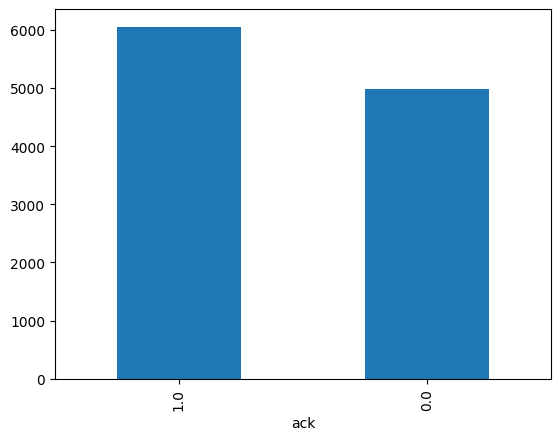

In [17]:
session.ack.value_counts().plot(kind='bar')

Atribút: page_activity_duration

In [18]:
session.page_activity_duration.describe()

count    11035.000000
mean         8.690997
std          2.233684
min          0.737390
25%          6.988780
50%          8.828940
75%         10.420815
max         15.557980
Name: page_activity_duration, dtype: float64

<Axes: xlabel='page_activity_duration', ylabel='Count'>

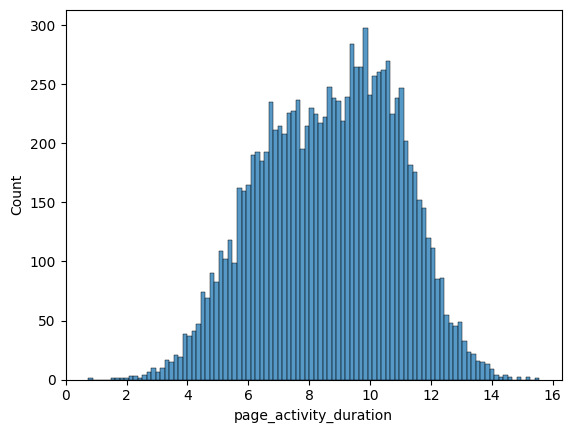

In [19]:
sns.histplot(session.page_activity_duration,bins=100)

<Axes: ylabel='page_activity_duration'>

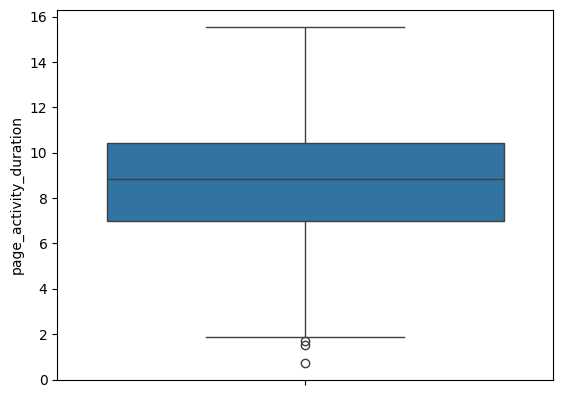

In [20]:
sns.boxplot(y = session.page_activity_duration)

Atribút: browser_name

In [21]:
session.browser_name.describe()

count      11046
unique         7
top       chrome
freq        3336
Name: browser_name, dtype: object

In [22]:
session['browser_name'].value_counts()


browser_name
chrome     3336
edge       3270
safari     1152
firefox    1086
mobile     1045
other       603
opera       554
Name: count, dtype: int64

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\3213134062.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=session,x="browser_name",palette=("YlOrRd_r"))


<Axes: xlabel='browser_name', ylabel='count'>

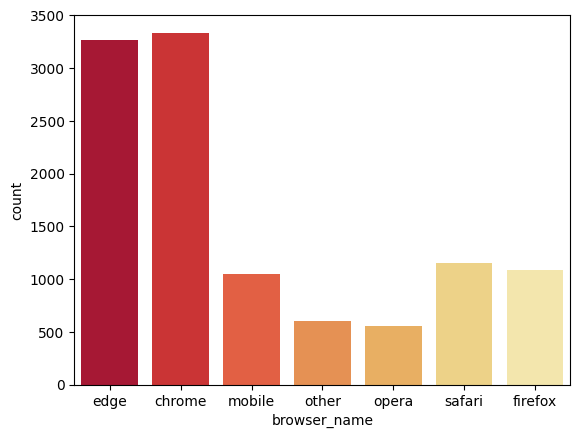

In [23]:
sns.countplot(data=session,x="browser_name",palette=("YlOrRd_r"))

Atribút: user_id

In [24]:
session.user_id.describe()

count    11046.000000
mean      1255.780645
std        718.615742
min          0.000000
25%        636.000000
50%       1250.500000
75%       1884.000000
max       2499.000000
Name: user_id, dtype: float64

Atribút: session_start

In [25]:
session.session_start.describe()


count                   11046
unique                  10915
top       2022-09-25 00:25:43
freq                        2
Name: session_start, dtype: object

Atribút: session_duration

In [26]:
session.session_duration.describe()


count    11046.000000
mean       150.604875
std         60.977556
min        -92.919090
25%        109.499407
50%        150.397070
75%        191.316595
max        391.029670
Name: session_duration, dtype: float64

<Axes: xlabel='session_duration', ylabel='Count'>

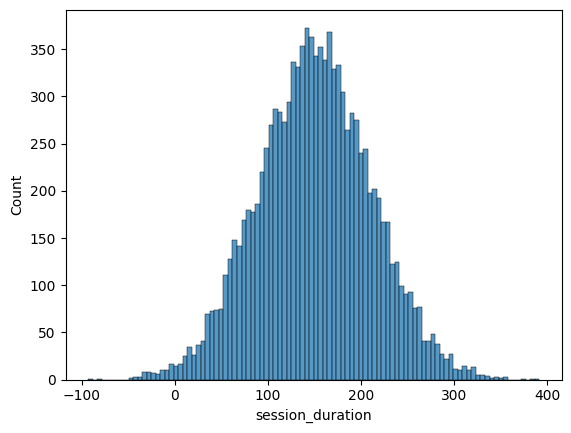

In [27]:
sns.histplot(session.session_duration,bins=100)

<Axes: ylabel='session_duration'>

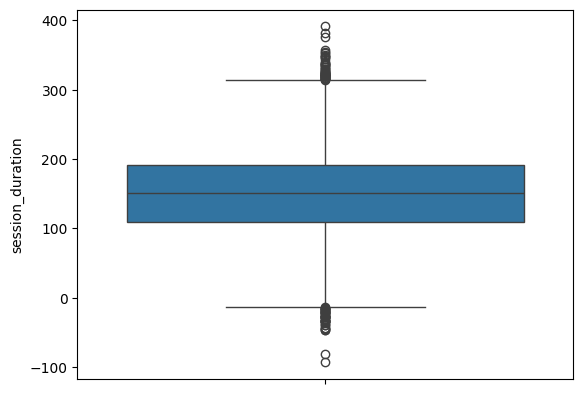

In [28]:
sns.boxplot(y = session.session_duration)

Identifikácia problémov v dátach s prvotným riešením

Analýza dát datasetu a nájdenie riešení pre optimalizáciu

In [29]:
print([key for key, value in session.dtypes.items() if value == 'object'])

['screen_width', 'session_start', 'screen_height', 'browser_name']


In [30]:
session.screen_height.unique()
session.screen_width.unique()

array(['800', '1280', '1366', '1024', '1920', 'lower', 'higher'],
      dtype=object)

podľa analýzy typov atribútov datasetu je možné vidieť nasledovné zlepšenia :
- screen_width, screen_height sú typu object (String), ideálne by bolo držať si ich vo formáte int

In [31]:
valid_heights = session[~session.screen_height.isin(["lower", "higher"])]
valid_heights['screen_height'] = valid_heights['screen_height'].astype(float)

valid_width = session[~session.screen_width.isin(["lower", "higher"])]
valid_width['screen_width'] = valid_width['screen_width'].astype(float)

min_height = valid_heights['screen_height'].min()
max_height = valid_heights['screen_height'].max()

min_width = valid_width['screen_width'].min()
max_width = valid_width['screen_width'].max()

def replace_values_height(value):
    if value == 'lower':
        return min_height
    elif value == 'higher':
        return max_height
    else:
        return value

def replace_values_width(value):
    if value == 'lower':
        return min_width
    elif value == 'higher':
        return max_width
    else:
        return value

session['screen_height'] = session['screen_height'].apply(replace_values_height)
session['screen_height'] = session['screen_height'].fillna(0).astype(int)

session['screen_width'] = session['screen_width'].apply(replace_values_width)
session['screen_width'] = session['screen_width'].fillna(0).astype(int)

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\2752222672.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_heights['screen_height'] = valid_heights['screen_height'].astype(float)
C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\2752222672.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_width['screen_width'] = valid_width['screen_width'].astype(float)


In [32]:
session.screen_height.unique()
session.screen_width.unique()

array([ 800, 1280, 1366, 1024, 1920])

Zmena reprezentácie "browser_name" zo Stringov na identifier (integer)

In [33]:
browser_names = session.browser_name.unique()
browser_names

array(['edge', 'chrome', 'mobile', 'other', 'opera', 'safari', 'firefox'],
      dtype=object)

In [34]:
browser_name_mapping = {
    'edge': 1,
    'chrome': 2,
    'mobile': 3,
    'firefox': 4,
    'opera': 5,
    'safari': 6,
    'other': 7
}

print("Pred zmenou: " + str(session['browser_name'].unique()))
session['browser_name'] = session['browser_name'].map(browser_name_mapping)

print("Po zmene: " + str(session['browser_name'].unique()))

Pred zmenou: ['edge' 'chrome' 'mobile' 'other' 'opera' 'safari' 'firefox']
Po zmene: [1 2 3 7 5 6 4]


Overenie duplicitných záznamov

In [35]:
duplicate = session[session.duplicated()]
session = session.drop_duplicates()
print("Počet záznamov v datasete: "+ str(len(session)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 10915
V datasete sa nachádza: 131 duplikátov.


Ďalšie možné úpravy: 

ujednotenie formátu session_start, lepšia interpretácia dátumu s časom (rozdelenie do dvoch collumns: date/time)

DATASET:user

Dataset user.csv obsahuje dokopy 2585 záznamov popisu produktov. Počet všetkých atribútov týchto záznamov je 11. 


In [36]:
user.shape

(2585, 11)

In [37]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2585 entries, 0 to 2584
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   address       2197 non-null   object
 1   birthdate     1422 non-null   object
 2   sex           1293 non-null   object
 3   registration  2585 non-null   object
 4   name          2585 non-null   object
 5   username      2585 non-null   object
 6   mail          2585 non-null   object
 7   user_id       2585 non-null   int64 
 8   job           1034 non-null   object
 9   residence     905 non-null    object
 10  race          776 non-null    object
dtypes: int64(1), object(10)
memory usage: 222.3+ KB


In [38]:
user.describe()

user_id
count  2585.000000
mean   1279.099420
std     733.313018
min       0.000000
25%     652.000000
50%    1283.000000
75%    1903.000000
max    2584.000000

Analýza významných atribútov v datasete

Atribúty z datasetu user.csv, ktoré nás budú zaujímať sú najmä birthdate, registration, user_id, sex a race.

Pri skúmaní môžeme napríklad zisťovať, či existuje nejaká závislosť medzi danými atribútmi a predikovanou premennou ack. 

Atribút user_id ako už bolo spomenuté budeme potrebovať pre vyhľadávanie hodnôt v druhom
datasete session.csv.

In [39]:
user.sex.value_counts()

sex
M    652
F    641
Name: count, dtype: int64

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\4036607838.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=user,x="sex",palette=("YlOrRd_r"))


<Axes: xlabel='sex', ylabel='count'>

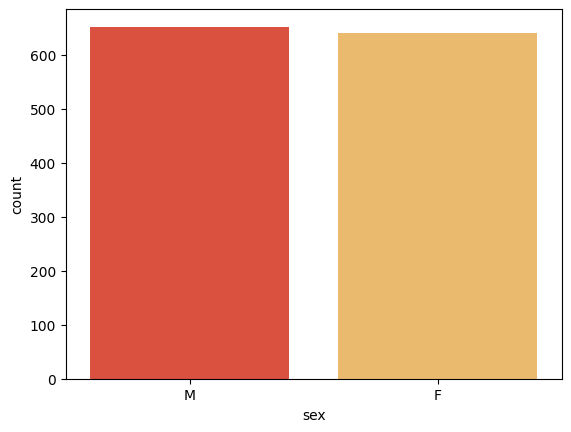

In [40]:
sns.countplot(data=user,x="sex",palette=("YlOrRd_r"))

In [41]:
user.race.value_counts()

race
unspecified    238
white          167
black          164
asian          144
indian          63
Name: count, dtype: int64

<Axes: ylabel='count'>

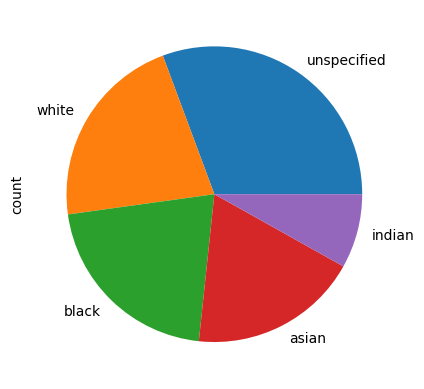

In [42]:
user.race.value_counts().plot(kind='pie')

In [43]:
user.birthdate.value_counts()

birthdate
1960-03-04    3
1928-10-27    2
1969-05-13    2
1977-12-04    2
1948-03-02    2
             ..
1912-03-27    1
2006-02-15    1
1936-06-06    1
1944-09-24    1
1929-12-10    1
Name: count, Length: 1395, dtype: int64

In [44]:
user.registration.value_counts()

registration
06 Nov 2014    4
2021-03-29     4
2020-09-15     3
20 Nov 2019    3
2014/12/29     3
              ..
2013-10-31     1
09 Apr 2022    1
2022/04/03     1
2023/02/10     1
2018-08-14     1
Name: count, Length: 2356, dtype: int64

Identifikácia problémov v dátach s prvotným riešením

podľa analýzy typov atribútov datasetu je možné vidieť nasledovné zlepšenia :
- 


Nahradiť hodnoty NaN v sex collumn na unspecified (užívateľ nešpecifikovaľ pohlavie)


In [45]:
print("Pred zmenou: " + str(user["sex"].unique()))
user["sex"].fillna(value="unspecified",inplace=True)
print("Po zmene: " + str(user["sex"].unique()))


Pred zmenou: ['M' nan 'F']
Po zmene: ['M' 'unspecified' 'F']


Sex je typu object (String), ideálne by bolo držať si ich vo formáte int

In [46]:
sex_mapping = {
    "M": 1,
    "F": 2,
    "unspecified": 0
}
print("Pred zmenou: " + str(user['sex'].unique()))
user['sex'] = user['sex'].map(sex_mapping)

print("Po zmene: " + str(user['sex'].unique()))

Pred zmenou: ['M' 'unspecified' 'F']
Po zmene: [1 0 2]


sex_mapping = {
    "M": 1,
    "F": 2,
    "unspecified": 0
}

print("Pred zmenou: " + str(user["sex"].unique()))
for i,value in enumerate(user["sex"]):
    user.loc[i,"sex"] = sex_mapping.get(value)

print("Po zmene: " + str(user["sex"].unique()))

Hodnoty NaN v race collumn zmeniť na "unspecified" -> v budúcnosti bude lepšie zvoliť lepšiu stratégiu náhrady

In [47]:
user.race.value_counts()

race
unspecified    238
white          167
black          164
asian          144
indian          63
Name: count, dtype: int64

In [48]:
print("Pred zmenou: " + str(user["race"].unique()))
user["race"].fillna(value="unspecified",inplace=True)
#user.dropna(subset=["race"], inplace=True)
print("Po zmene: " + str(user["race"].unique()))

Pred zmenou: ['unspecified' nan 'asian' 'white' 'black' 'indian']
Po zmene: ['unspecified' 'asian' 'white' 'black' 'indian']


In [49]:
user.race.value_counts()

race
unspecified    2047
white           167
black           164
asian           144
indian           63
Name: count, dtype: int64

Overenie duplicitných záznamov

In [50]:
duplicate = user[user.duplicated()]
user = user.drop_duplicates()
print("Počet záznamov v datasete: "+str(len(user)))
print("V datasete sa nachádza: " + str(len(duplicate)) + " duplikátov.")

Počet záznamov v datasete: 2585
V datasete sa nachádza: 0 duplikátov.


Overenie prázdnych hodnôt

In [51]:
session.isnull().sum()

user_id                            0
pct_rage_click                    11
page_activity_duration            11
pct_wild_mouse                    11
product_ean                        0
pct_click_product_info            11
pct_input                         11
pct_scrandom                      11
total_load_time                    0
pct_click                         11
screen_width                       0
pct_scroll_move_duration          11
ack                                0
pct_mouse_click                   11
pct_doubleclick                   11
mouse_move_total_rel_distance     11
session_start                      0
screen_height                      0
pct_mouse_move                    11
browser_name                       0
pct_scroll_move                   11
session_id                         0
scroll_move_total_rel_distance    11
session_duration                   0
wild_mouse_duration               11
dtype: int64

Ako máme možnosť vidieť v niektorých stĺpcoch chýbajú viaceré hodnoty. Preto sme sa rozhodli tieto číselné
atribúty nahradiť priemerom, keďže nechceme prísť o ďalšie dáta.


In [52]:
pct_rage_clickMean = session['pct_rage_click'].mean()
session['pct_rage_click'] = session['pct_rage_click'].fillna(pct_rage_clickMean)
page_activity_durationMean = session['page_activity_duration'].mean()
session['page_activity_duration'] = session['page_activity_duration'].fillna(page_activity_durationMean)
pct_wild_mouseMean = session['pct_wild_mouse'].mean()
session['pct_wild_mouse'] = session['pct_wild_mouse'].fillna(pct_wild_mouseMean)
pct_click_product_infoMean = session['pct_click_product_info'].mean()
session['pct_click_product_info'] = session['pct_click_product_info'].fillna(pct_click_product_infoMean)
pct_inputMean = session['pct_input'].mean()
session['pct_input'] = session['pct_input'].fillna(pct_inputMean)
pct_scrandomMean = session['pct_scrandom'].mean()
session['pct_scrandom'] = session['pct_scrandom'].fillna(pct_scrandomMean)
pct_clickMean = session['pct_click'].mean()
session['pct_click'] = session['pct_click'].fillna(pct_clickMean)
pct_scroll_move_durationMean = session['pct_scroll_move_duration'].mean()
session['pct_scroll_move_duration'] = session['pct_scroll_move_duration'].fillna(pct_scroll_move_durationMean)
pct_mouse_clickMean = session['pct_mouse_click'].mean()
session['pct_mouse_click'] = session['pct_mouse_click'].fillna(pct_mouse_clickMean)
pct_doubleclickMean = session['pct_doubleclick'].mean()
session['pct_doubleclick'] = session['pct_doubleclick'].fillna(pct_doubleclickMean)
mouse_move_total_rel_distanceMean = session['mouse_move_total_rel_distance'].mean()
session['mouse_move_total_rel_distance'] = session['mouse_move_total_rel_distance'].fillna(mouse_move_total_rel_distanceMean)
pct_mouse_moveMean = session['pct_mouse_move'].mean()
session['pct_mouse_move'] = session['pct_mouse_move'].fillna(pct_mouse_moveMean)
pct_scroll_moveMean = session['pct_scroll_move'].mean()
session['pct_scroll_move'] = session['pct_scroll_move'].fillna(pct_scroll_moveMean)
scroll_move_total_rel_distanceMean = session['scroll_move_total_rel_distance'].mean()
session['scroll_move_total_rel_distance'] = session['scroll_move_total_rel_distance'].fillna(scroll_move_total_rel_distanceMean)
wild_mouse_durationMean = session['wild_mouse_duration'].mean()
session['wild_mouse_duration'] = session['wild_mouse_duration'].fillna(wild_mouse_durationMean)

In [53]:
session.isnull().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
session_start                     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
dtype: int64

Párová analýza dát


Heatmap

<Axes: >

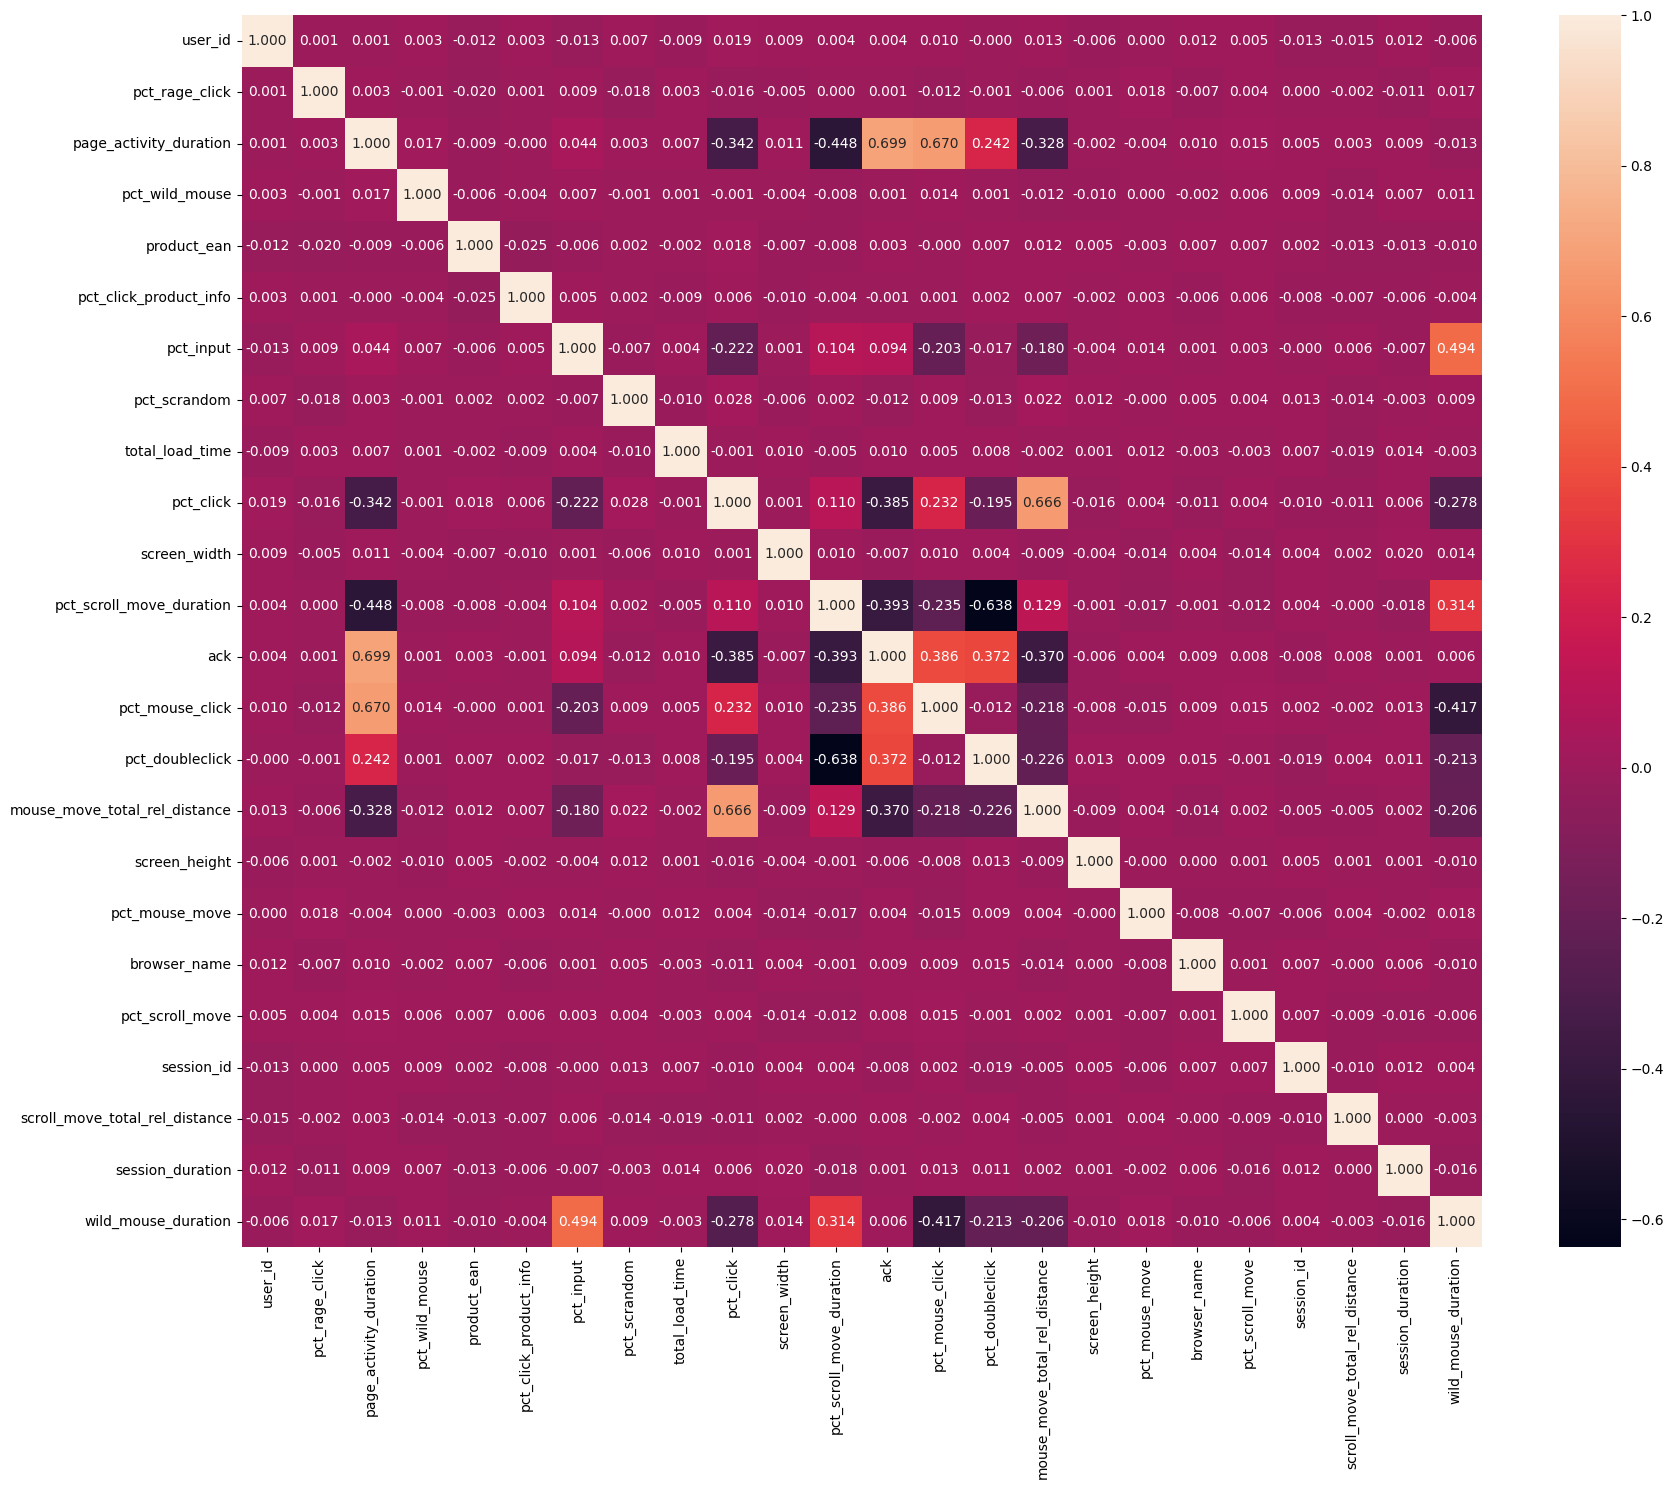

In [54]:
figure, ax = plt.subplots(figsize=(20,16))
session_sub = session.copy()
session_sub.drop('session_start',axis = 1,inplace=True)
sns.heatmap(session_sub.corr(),ax=ax, annot =True, fmt = ".3f")


Z tejto heatmapy môžeme vyčítať viacero informácii. Ako máme možnosť vidieť atribúty:

    pct_rage_click
    pct_wild_mouse
    product-ean
    pct_click_product_info
    total_load_time
    screen_width
    screen_height
    pct_mouse_move
    pct_scroll_move
    session_id
    scroll_move-total_rel_distance
    session_duration

Majú takmer nulovú koreláciu s ostatnými atribútmi. To znamená, že tieto atribúty nám vo vzájomných
závislostiach neposkytujú takmer žiadnu informáciu.

 Naopak si môžeme všimnúť atribúty:

    page_activity_duration
    pct_click
    pct_scroll_move_duration
    ack
    pct_mouse_click
    pct_doubleclick
    mouse_move_total_rel_distance
    wild_mouse_duration

  Medzi sebou v určitej miere korelujú a preto budeme skúmať ich závislosti neskôr.

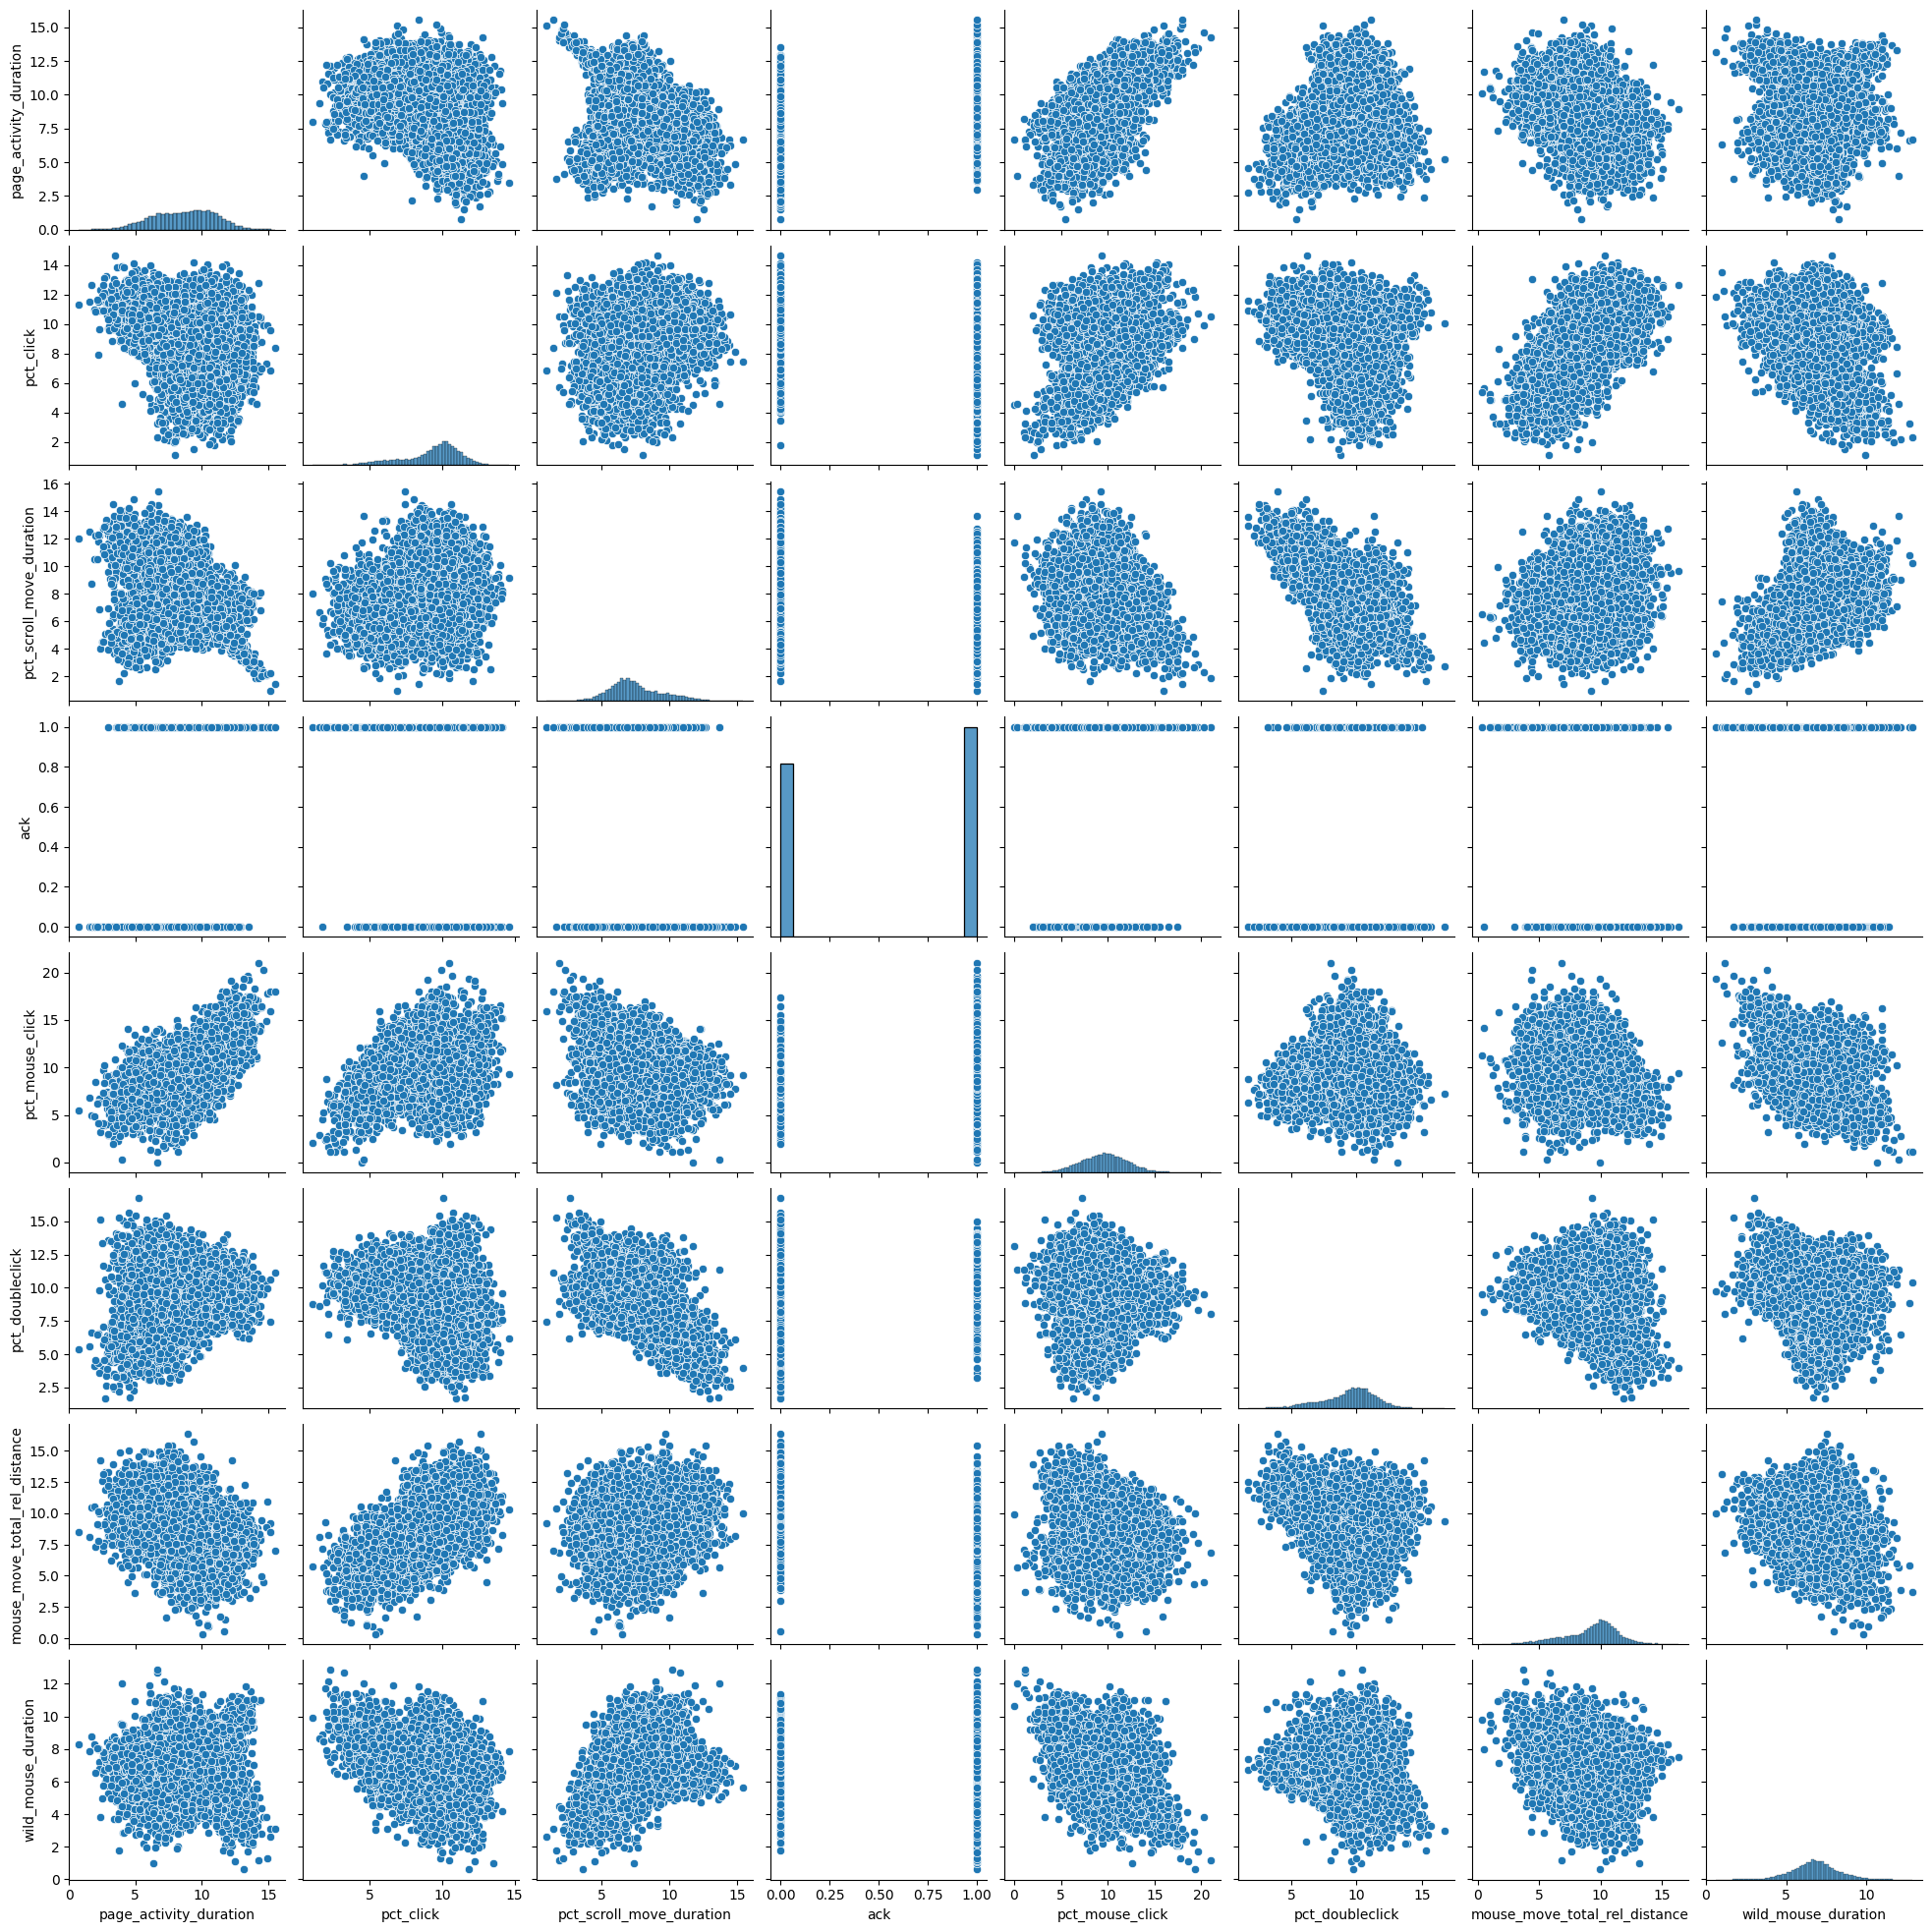

In [55]:
sns.pairplot(session, vars=['page_activity_duration','pct_click', 
                            'pct_scroll_move_duration','ack',
    'pct_mouse_click', 'pct_doubleclick', 'mouse_move_total_rel_distance',
    'wild_mouse_duration'])

Postupne sme si vygenerovali všetky závislé grafy vzhľadom na atribút ack

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\2222207023.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  session.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'screen_width'}>,
        <Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'screen_height'}>,
        <Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'browser_name'}>,
   

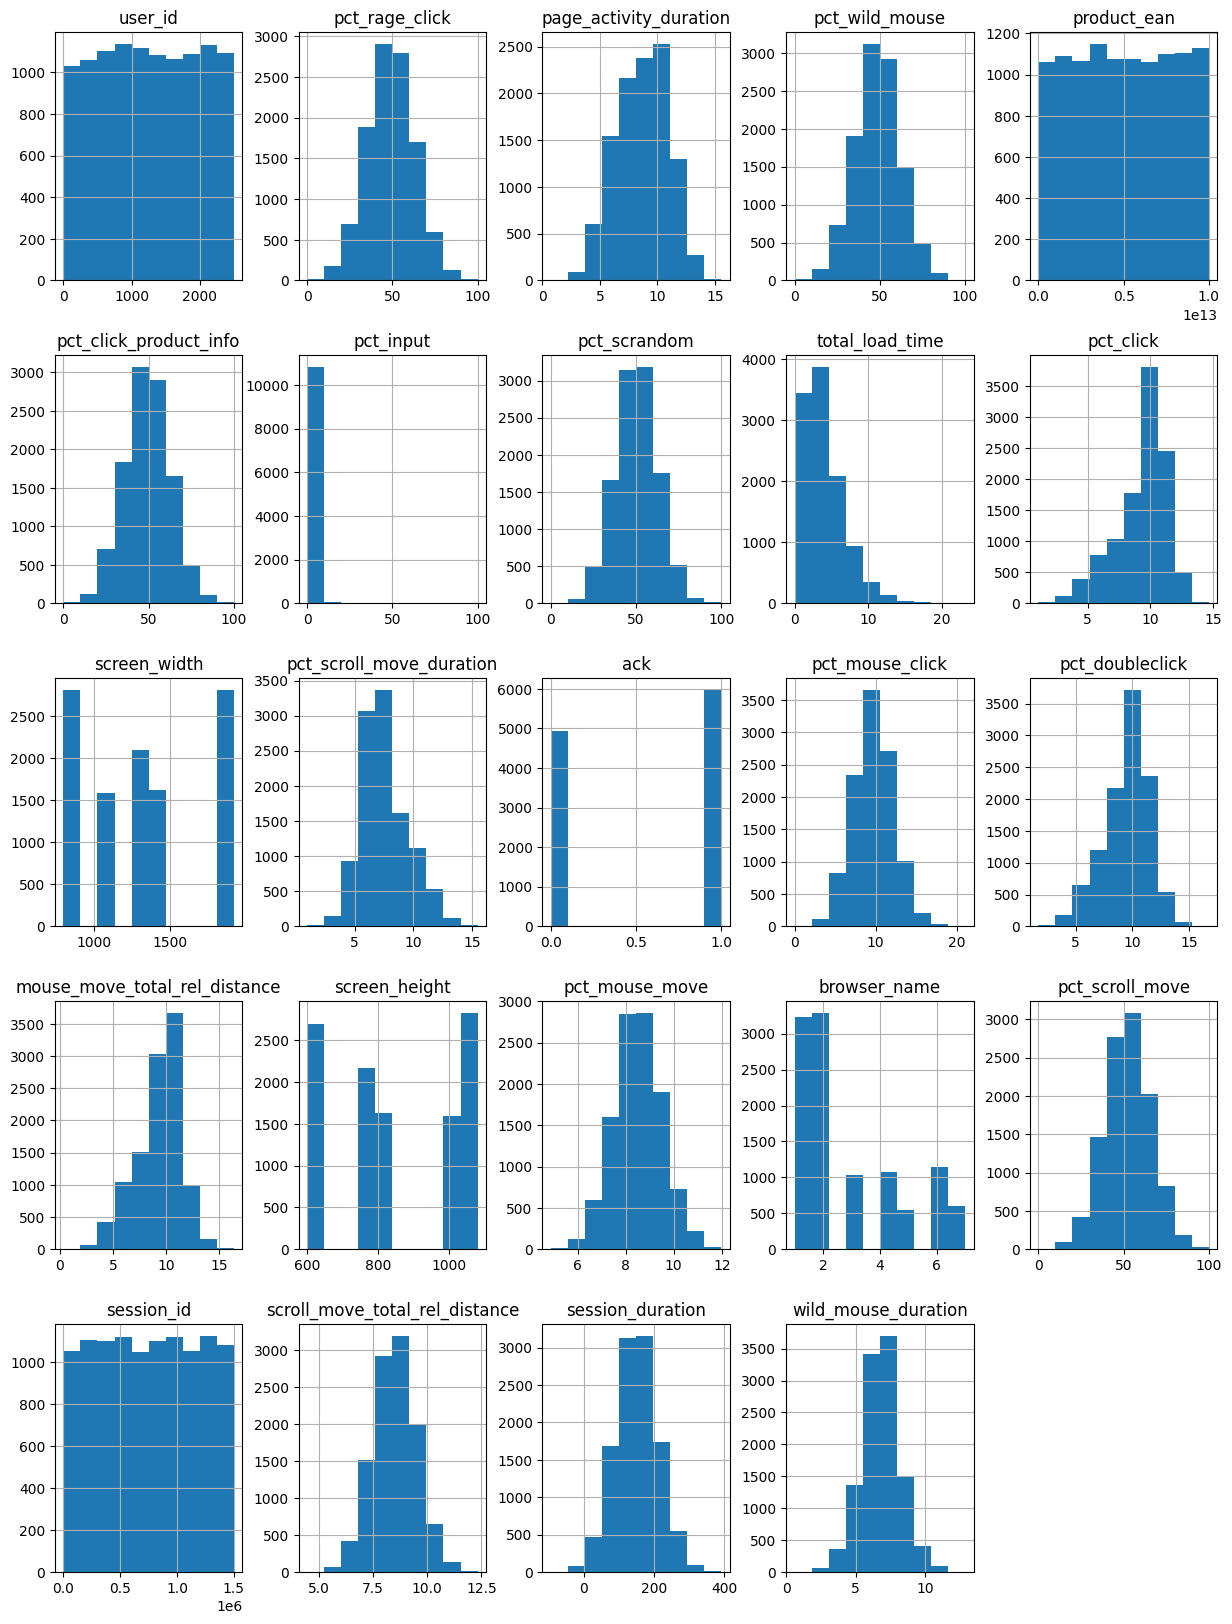

In [56]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
session.hist(ax = ax)

Z heatmapy vieme pozorovať pri vybranných premenných veľa vzájomných korelácii, v nasledujúcich riadkoch máme pár príkladov. 

<Axes: xlabel='page_activity_duration', ylabel='pct_click'>

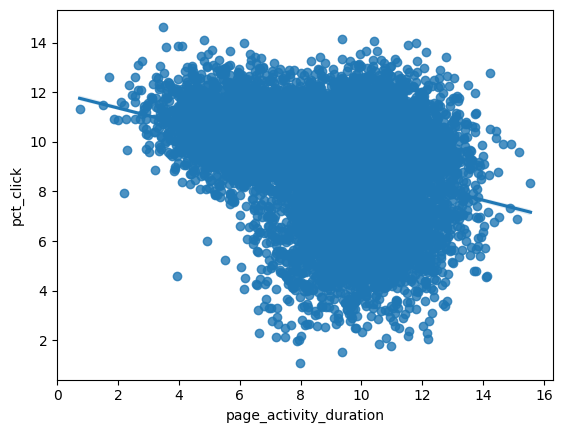

In [57]:
sns.regplot(x="page_activity_duration",y="pct_click",data=session)



<Axes: xlabel='page_activity_duration', ylabel='pct_scroll_move_duration'>

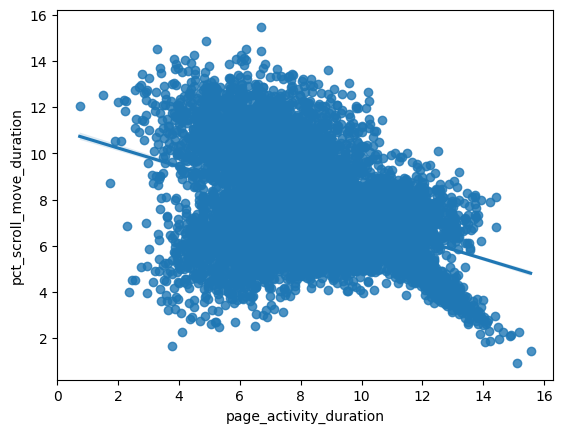

In [58]:
sns.regplot(x="page_activity_duration",y="pct_scroll_move_duration",data=session)


<Axes: xlabel='page_activity_duration', ylabel='pct_mouse_click'>

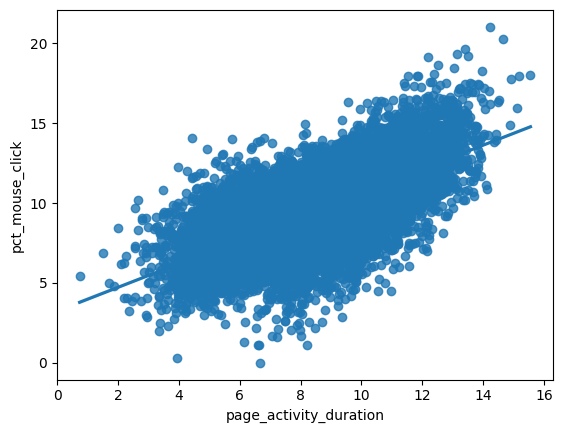

In [59]:
sns.regplot(x="page_activity_duration",y="pct_mouse_click",data=session)


<Axes: xlabel='page_activity_duration', ylabel='mouse_move_total_rel_distance'>

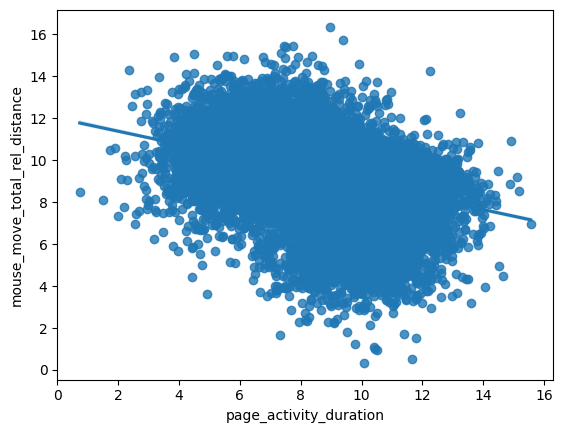

In [60]:
sns.regplot(x="page_activity_duration",y="mouse_move_total_rel_distance",data=session)


Dané grafy vyjadrovali negatívne a pozitívne korelácie medzi atribútom page_activity_duration a pct_click, pct_mouse_click, mouse_move_total_rel_distance..
Čo sme vyčítali aj z heatmapy.


     Párová analýza dát medzi predikovanou premennou a ostatnými premennými (potenciálnymi prediktormi).


V nasledujúcich grafoch môžeme vidieť negatívne korelácie predikovanej premmenej ack s ostatnými premenými, čo vieme vyčítať aj z heatmapy.

<Axes: xlabel='ack', ylabel='pct_scroll_move_duration'>

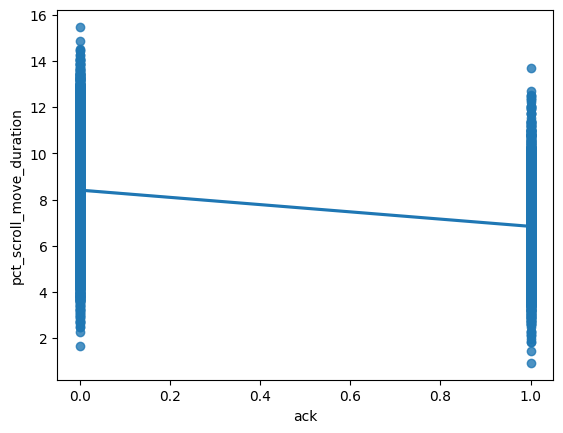

In [61]:
sns.regplot(x="ack",y="pct_scroll_move_duration",data=session)

<Axes: xlabel='ack', ylabel='pct_click'>

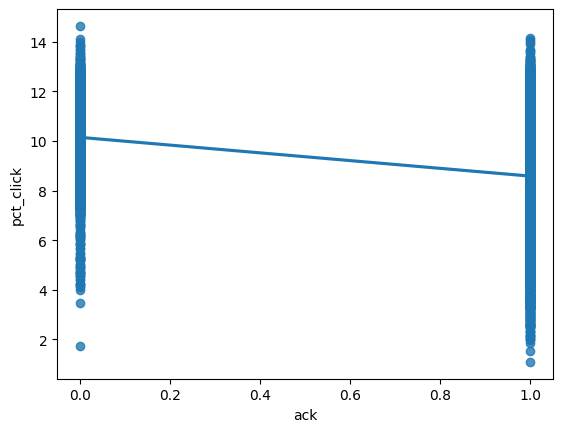

In [62]:
sns.regplot(x="ack",y="pct_click",data=session)

<Axes: xlabel='ack', ylabel='mouse_move_total_rel_distance'>

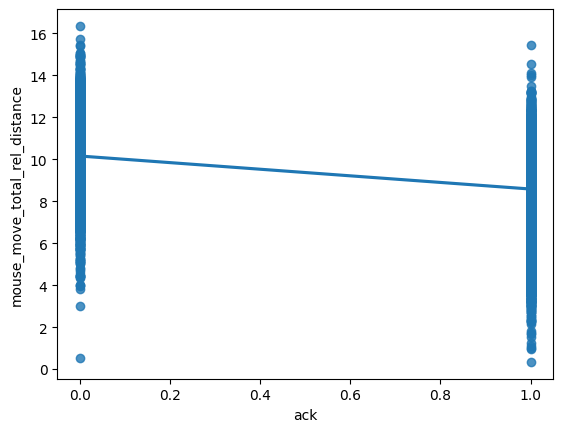

In [63]:
sns.regplot(x="ack",y="mouse_move_total_rel_distance",data=session)


V nasledujúcich grafoch môžeme vidieť pozitívne korelácie predikovanej premmenej ack s ostatnými premenými, čo vieme vyčítaať aj z heatmapy.

<Axes: xlabel='ack', ylabel='pct_doubleclick'>

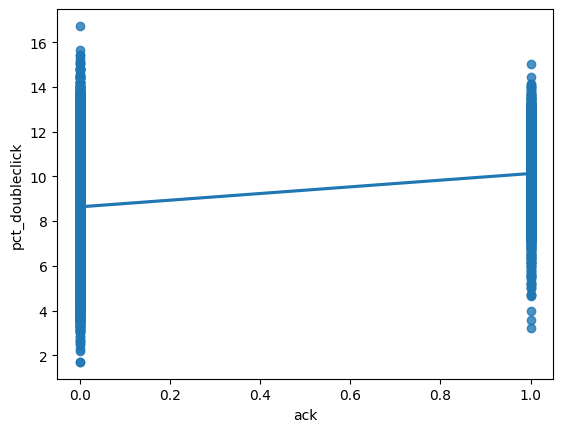

In [64]:
sns.regplot(x="ack",y="pct_doubleclick",data=session)

<Axes: xlabel='ack', ylabel='pct_mouse_click'>

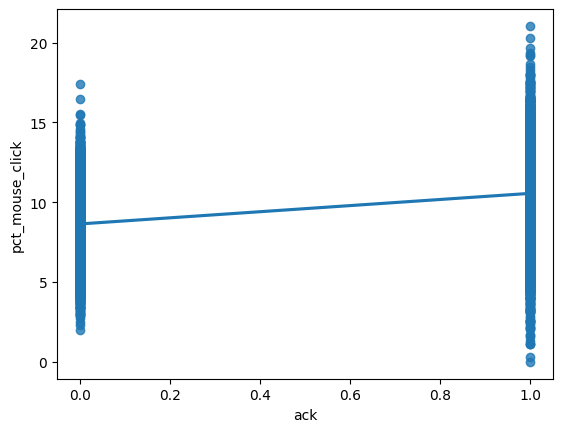

In [65]:
sns.regplot(x="ack",y="pct_mouse_click",data=session)

<Axes: xlabel='ack', ylabel='page_activity_duration'>

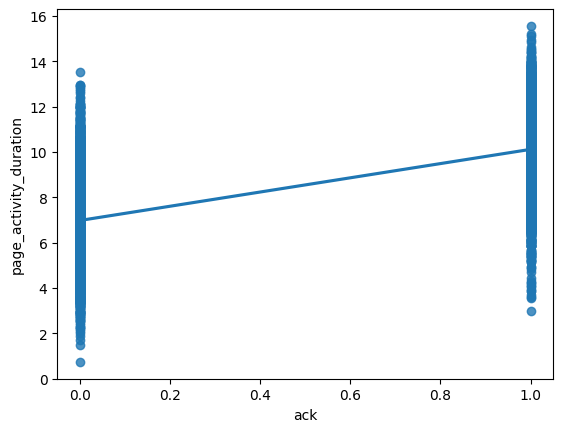

In [66]:
sns.regplot(x="ack",y="page_activity_duration",data=session)

    Formulácia a štatistické overenie hypotéz o dátach

Hypotéza č.1: čas strávený na stránke (page_activity_duration) má priemerne väčšiu hodnotu pokiaľ používateľ uskutočnil nákup (ack=1)

In [67]:
purchased = session[session["ack"] == 1].page_activity_duration
not_purchased = session[session["ack"] == 0].page_activity_duration
session["ack"].value_counts()

ack
1.0    5979
0.0    4936
Name: count, dtype: int64

<Axes: xlabel='page_activity_duration', ylabel='Count'>

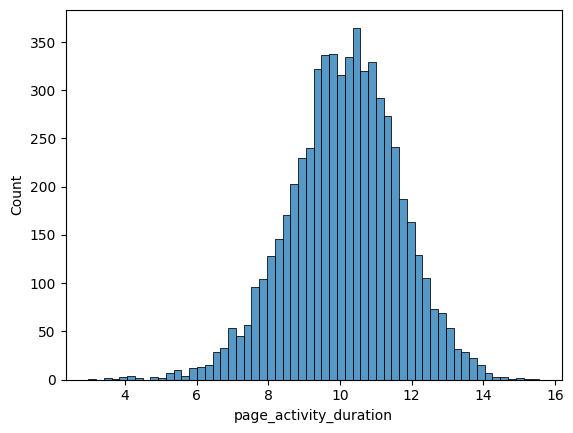

In [68]:
sns.histplot(purchased)

<Axes: xlabel='page_activity_duration', ylabel='Count'>

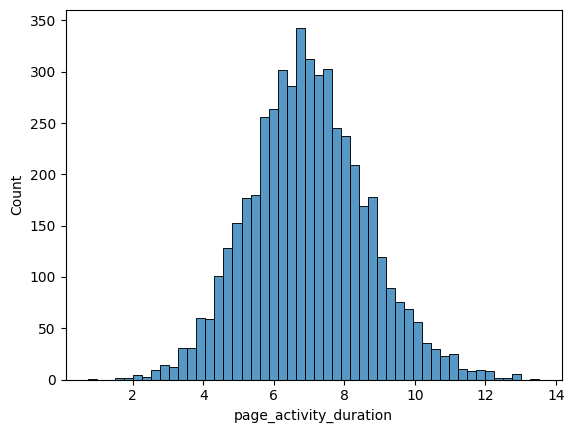

In [69]:
sns.histplot(not_purchased)

Po analyzovaní grafov vidíme, že oba majú veľký počet outlierov (dáta, ktoré sú zjavne rozdielne, a tým vedia rozrušiť následovné správne použitie). Preto ich odstránime

In [70]:
purchased = purchased[purchased.between(purchased.quantile(0.20),purchased.quantile(0.80))]
not_purchased = not_purchased[not_purchased.between(not_purchased.quantile(0.20),not_purchased.quantile(0.80))]

In [71]:
purchased.describe()

count    3587.000000
mean       10.160831
std         0.687893
min         8.869560
25%         9.589915
50%        10.169330
75%        10.741180
max        11.379880
Name: page_activity_duration, dtype: float64

<Axes: xlabel='page_activity_duration', ylabel='Count'>

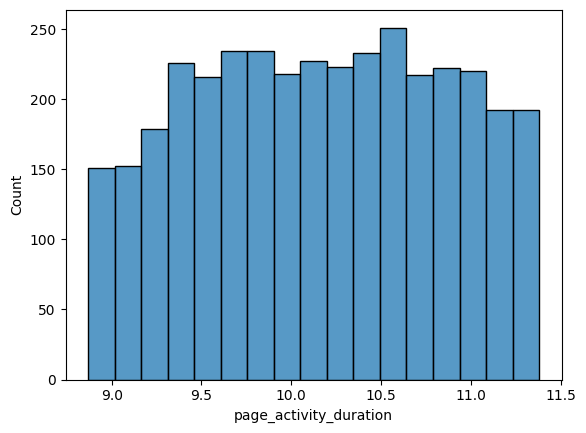

In [72]:
sns.histplot(purchased)

In [73]:
not_purchased.describe()

count    2962.000000
mean        6.933114
std         0.738884
min         5.634400
25%         6.312663
50%         6.919145
75%         7.524632
max         8.316220
Name: page_activity_duration, dtype: float64

<Axes: xlabel='page_activity_duration', ylabel='Count'>

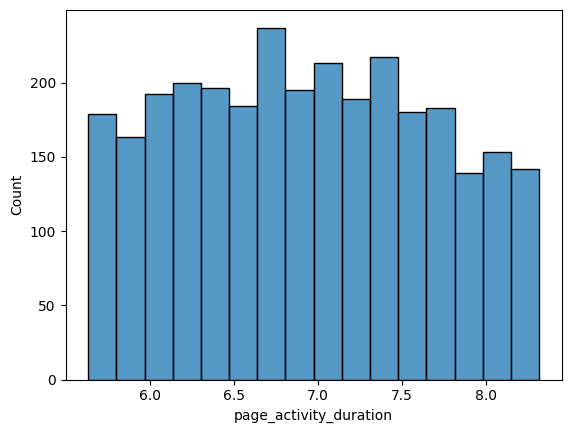

In [74]:
sns.histplot(not_purchased)

Po odstránení outlierov už dostávame zmenené, oveľa presnejšie dáta

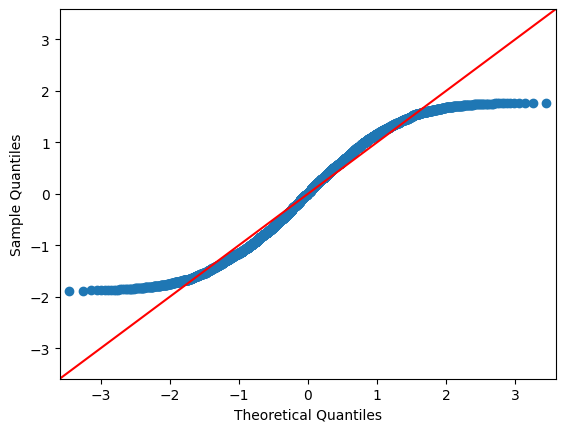

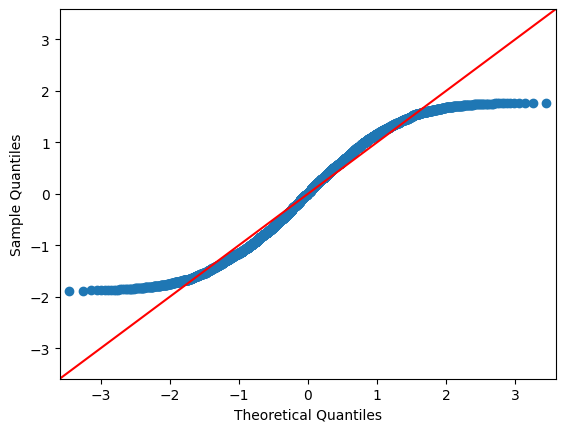

In [75]:
sm.ProbPlot(purchased,fit=True).qqplot(line="45")

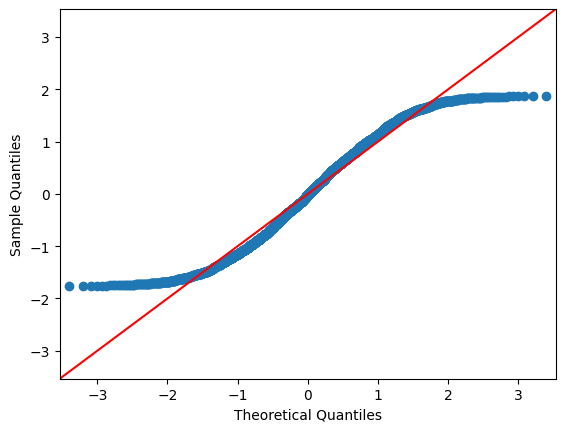

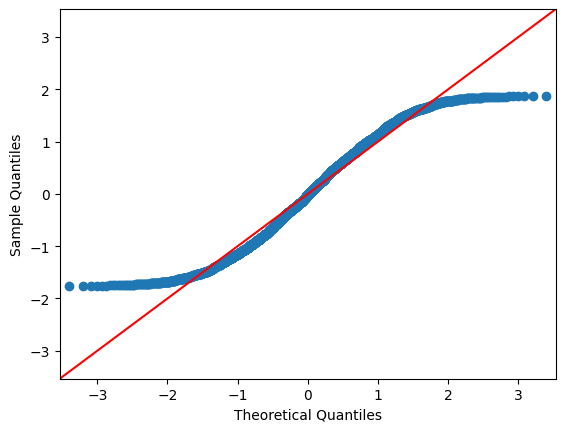

In [76]:
sm.ProbPlot(not_purchased,fit=True).qqplot(line="45")

QQ plot znázorňuje, že sú oba datasety z rovnakého rozdelenia. Na overenie tohoto faktu môžeme použiť Shapiro-Wilk test.

In [77]:
stats.shapiro(purchased)

ShapiroResult(statistic=0.9640382528305054, pvalue=5.241538714271387e-29)

In [78]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9658991098403931, pvalue=6.438138517648812e-26)

In [79]:
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=10624694.0, pvalue=0.0)

Mannwhitneyov test vyšiel 0, a tým pádom vieme povedať, že nulová hypotéza je zamietnutá.

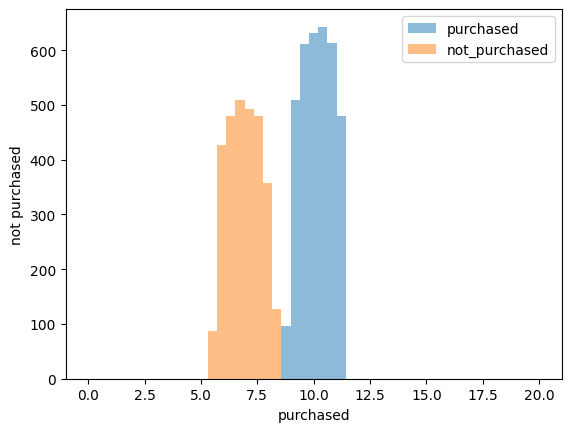

In [80]:
bins = np.linspace(0, 20, 50)
plt.hist(purchased, bins, alpha=0.5, label='purchased')
plt.hist(not_purchased, bins, alpha=0.5, label='not_purchased')
plt.legend(loc='upper right')
plt.xlabel('purchased')
plt.ylabel('not purchased')
plt.show()

Hypotéza č.2: na základe analýzy atribútu(pct_click) vieme povedať, že tento atribút má menšiu hodnotu pokiaľ užívateľ neuskutočnil nákup (ack=0) (používateľ veľa klikal)

In [81]:
purchased = session[session["ack"] == 1].pct_click
not_purchased = session[session["ack"] == 0].pct_click
session["ack"].value_counts()

ack
1.0    5979
0.0    4936
Name: count, dtype: int64

<Axes: xlabel='pct_click', ylabel='Count'>

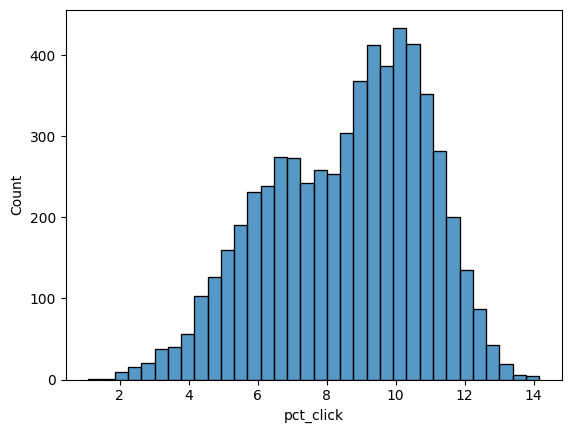

In [82]:
sns.histplot(purchased)

<Axes: xlabel='pct_click', ylabel='Count'>

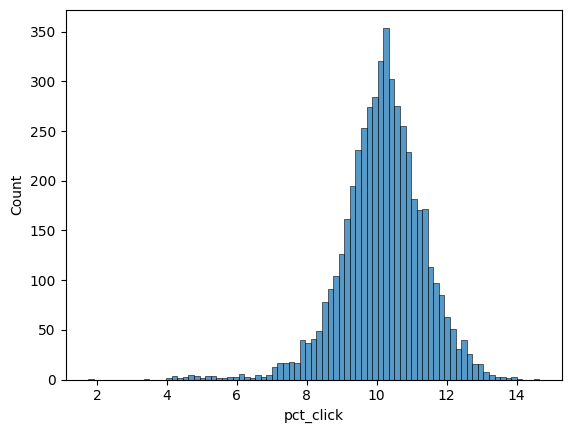

In [83]:
sns.histplot(not_purchased)

Znova si odstránime outliery pre účel presnejších dát

In [84]:
purchased = purchased[purchased.between(purchased.quantile(0.30),purchased.quantile(0.70))]
not_purchased = not_purchased[not_purchased.between(not_purchased.quantile(0.30),not_purchased.quantile(0.70))]

In [85]:
purchased.describe()

count    2391.000000
mean        8.848833
std         0.803930
min         7.267480
25%         8.195820
50%         8.949560
75%         9.533070
max        10.092800
Name: pct_click, dtype: float64

<Axes: xlabel='pct_click', ylabel='Count'>

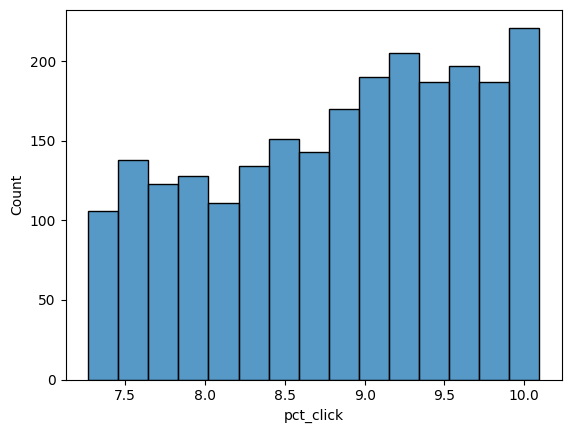

In [86]:
sns.histplot(purchased)

In [87]:
not_purchased.describe()

count    1974.000000
mean       10.193599
std         0.293280
min         9.658320
25%         9.947650
50%        10.204215
75%        10.438012
max        10.720880
Name: pct_click, dtype: float64

<Axes: xlabel='pct_click', ylabel='Count'>

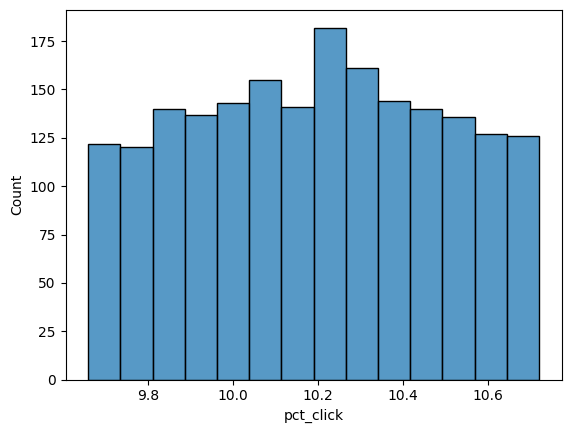

In [88]:
sns.histplot(not_purchased)

znova vytvoríme QQploty, a spravíme testy pre výsledok hypotézy

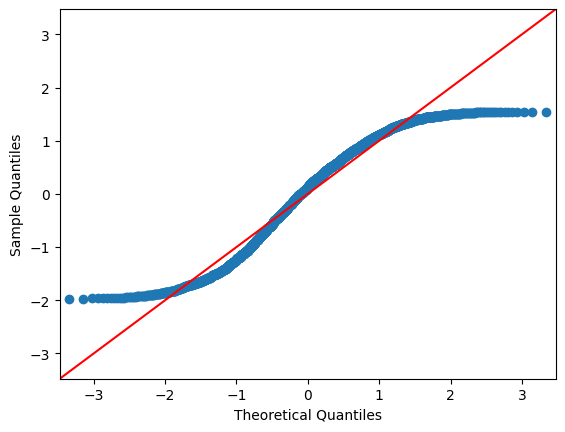

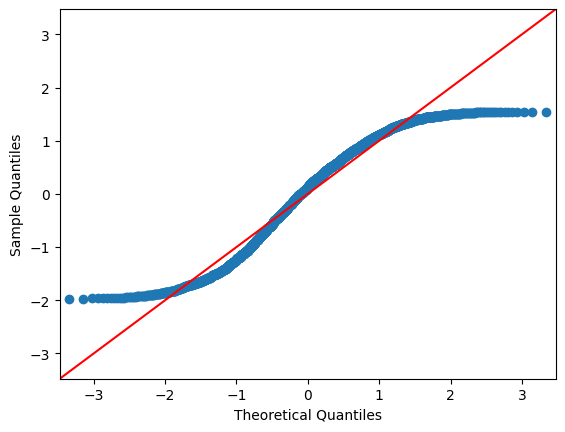

In [89]:
sm.ProbPlot(purchased,fit=True).qqplot(line="45")

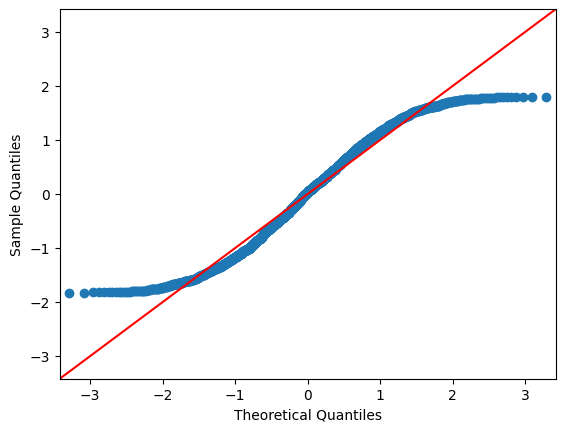

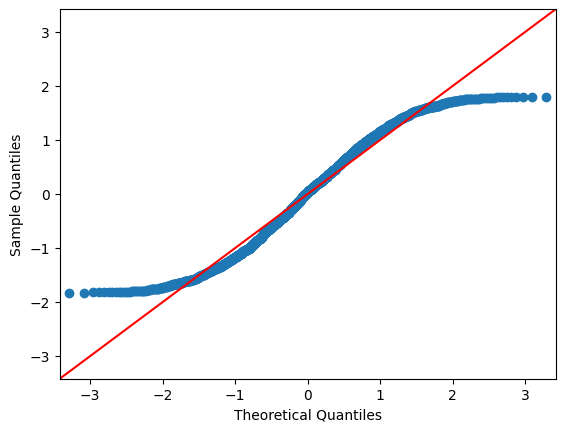

In [90]:
sm.ProbPlot(not_purchased,fit=True).qqplot(line="45")

In [91]:
stats.shapiro(purchased)

ShapiroResult(statistic=0.9509487748146057, pvalue=1.4054987029496033e-27)

In [92]:
stats.shapiro(not_purchased)

ShapiroResult(statistic=0.9654536247253418, pvalue=2.482489379513111e-21)

In [93]:
stats.mannwhitneyu(purchased,not_purchased)

MannwhitneyuResult(statistic=179579.5, pvalue=0.0)

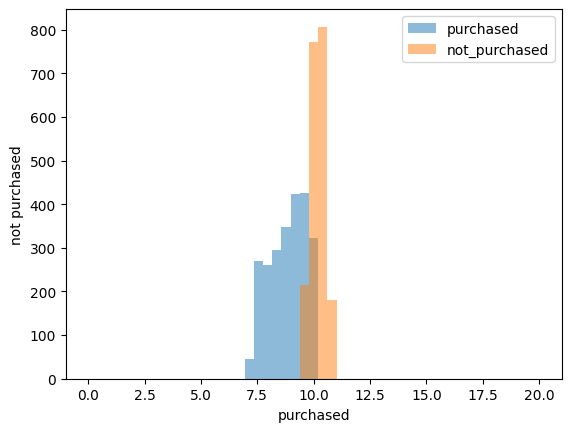

In [94]:
bins = np.linspace(0, 20, 50)
plt.hist(purchased, bins, alpha=0.5, label='purchased')
plt.hist(not_purchased, bins, alpha=0.5, label='not_purchased')
plt.legend(loc='upper right')
plt.xlabel('purchased')
plt.ylabel('not purchased')
plt.show()

analýza nám tak isto vyšla nula, a teda nulová hypotéza je vyvrátená.

IAU Projekt 2.fáza - Predspracovanie údajov 

Dátum: 19.11.2023

In [95]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [96]:
import pandas as pd
from datetime import date
from sklearn.impute import SimpleImputer
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler, Normalizer, QuantileTransformer
from sklearn.model_selection import train_test_split

    Integrácia a čistenie dát

Skontrolovanie, kde v datasetoch sa ešte vyskytujú missing values.

Ako môžeme vidieť v datasete session nám už nechýbajú dáta, lebo sme missing values pre daný dataset v 1. fáze nahrádzali priemerom(mean).

Potrebujeme odstrániť nezmyselné indexovanie za jeden z možných atribútov.

In [97]:
session["session_start"] = pd.to_datetime(session["session_start"])

In [98]:
session.head()

user_id  pct_rage_click  page_activity_duration  pct_wild_mouse  \
0     1267        13.36096                11.11023        57.22747   
1     1831        39.43056                11.38646        48.81767   
2      374        62.84361                11.17206        53.92373   
3     2260        64.68865                 6.33869        37.68672   
4      779        63.11689                 4.82687        54.53248   

     product_ean  pct_click_product_info  pct_input  pct_scrandom  \
0  5118402349247                61.27995    1.69380      34.23153   
1  6613735863389                55.97373    1.93407      58.66919   
2  7388729766852                57.18573    1.59960      47.47953   
3  1190955887968                54.34917    0.44924      39.85515   
4  9538008640320                27.01917    1.21089      15.93508   

   total_load_time  pct_click  ...  mouse_move_total_rel_distance  \
0          9.49291   11.96745  ...                        9.99263   
1          1.26378   10.36340  ...                       10.30287   
2          3.28962    5.02218  ...                        7.49351   
3          2.25213   11.32430  ...                        8.26995   
4          4.11748   10.18901  ...                       12.31943   

        session_start  screen_height  pct_mouse_move  browser_name  \
0 2021-08-31 01:16:45            600         9.55140             1   
1 2021-05-28 17:34:01            768         8.07874             2   
2 2018-12-28 16:43:17           1024         6.88911             2   
3 2022-02-03 06:22:50            800         7.53323             1   
4 2021-03-10 00:03:46            768         9.00901             3   

   pct_scroll_move session_id  scroll_move_total_rel_distance  \
0         77.30550    1011277                         8.30487   
1         61.26521     539491                         7.70199   
2         48.98359     394667                         8.17021   
3         66.82098     748123                         7.97703   
4         75.85706     758679                         9.01442   

   session_duration  wild_mouse_duration  
0         145.66025              8.27685  
1         109.48956              8.38637  
2         204.12507              8.36077  
3         123.40293              4.17809  
4         179.22699              8.08819  

[5 rows x 25 columns]

In [99]:
session = session.sort_values(by="session_start")
session.set_index("session_start", inplace=True)

In [100]:
session.head()

user_id  pct_rage_click  page_activity_duration  \
session_start                                                          
2018-09-23 07:39:19      613        38.92434                 4.10519   
2018-09-23 10:23:26      852        37.73544                 8.95891   
2018-09-23 14:07:42      747        41.69711                 6.80071   
2018-09-23 22:11:36      237        53.56196                 6.02331   
2018-09-23 22:19:18     1343        40.33001                13.55867   

                     pct_wild_mouse    product_ean  pct_click_product_info  \
session_start                                                                
2018-09-23 07:39:19        44.68086  8007907735464                35.38923   
2018-09-23 10:23:26        71.68736  2824090855078                58.69676   
2018-09-23 14:07:42        16.80705  8694137556862                52.55228   
2018-09-23 22:11:36        39.88749  8997503657362                25.04823   
2018-09-23 22:19:18        50.87605  5001742728363                58.85662   

                     pct_input  pct_scrandom  total_load_time  pct_click  ...  \
session_start                                                             ...   
2018-09-23 07:39:19    0.74795      39.84179          0.42006   10.25317  ...   
2018-09-23 10:23:26    0.82434      38.20916          3.61182    9.15468  ...   
2018-09-23 14:07:42    0.64409      34.54273          4.07548    9.53849  ...   
2018-09-23 22:11:36    0.65760      52.71192          0.96494    9.23365  ...   
2018-09-23 22:19:18    0.67158      39.81941          1.51166    9.67091  ...   

                     pct_doubleclick  mouse_move_total_rel_distance  \
session_start                                                         
2018-09-23 07:39:19          9.59557                        8.46606   
2018-09-23 10:23:26          6.26859                       11.68977   
2018-09-23 14:07:42          4.49728                       11.84482   
2018-09-23 22:11:36          5.70248                        9.20181   
2018-09-23 22:19:18         10.98286                        8.21535   

                     screen_height  pct_mouse_move  browser_name  \
session_start                                                      
2018-09-23 07:39:19           1080         8.67526             7   
2018-09-23 10:23:26           1080         7.82116             2   
2018-09-23 14:07:42            768         8.33824             1   
2018-09-23 22:11:36           1024         9.45194             1   
2018-09-23 22:19:18           1080         7.77920             1   

                     pct_scroll_move  session_id  \
session_start                                      
2018-09-23 07:39:19         42.43842      693560   
2018-09-23 10:23:26         46.42648     1166699   
2018-09-23 14:07:42         46.88715      839284   
2018-09-23 22:11:36         75.06534     1476123   
2018-09-23 22:19:18         49.92497      290576   

                     scroll_move_total_rel_distance  session_duration  \
session_start                                                           
2018-09-23 07:39:19                         9.61254         206.41481   
2018-09-23 10:23:26                         8.58039         182.51974   
2018-09-23 14:07:42                        10.57076         154.26394   
2018-09-23 22:11:36                         8.56598         204.06864   
2018-09-23 22:19:18                         7.81863         192.10045   

                     wild_mouse_duration  
session_start                             
2018-09-23 07:39:19              6.63551  
2018-09-23 10:23:26              6.40593  
2018-09-23 14:07:42              6.92640  
2018-09-23 22:11:36              6.33990  
2018-09-23 22:19:18              2.17693  

[5 rows x 24 columns]

In [101]:
session.isna().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
dtype: int64

In [102]:
product.isna().sum()

code           20
store_name      0
product_ean     0
location        0
dtype: int64

Odstránime missing values v datasete product

In [103]:
product = product.dropna()

In [104]:
product = product.reset_index().drop("index",axis=1)

In [105]:
product.isna().sum()

code           0
store_name     0
product_ean    0
location       0
dtype: int64

In [106]:
user.isna().sum()

address          388
birthdate       1163
sex                0
registration       0
name               0
username           0
mail               0
user_id            0
job             1551
residence       1680
race               0
dtype: int64

Odstránenime nepotrebné atribúty v pokračovaní našej analýze job, residence a address.

In [107]:
user = user.dropna(subset=['job','address', 'residence'])

Nahrádzanie missing values priemerom v atribúte birthdate.

In [108]:
user["birthdate"] = pd.to_datetime(user["birthdate"], errors="coerce")

In [109]:
mean_birthdate = user["birthdate"].mean()
user.fillna(mean_birthdate, inplace=True)

Z datetime odstránime presný čas(hodiny, minúty a sekundy).

In [110]:
user["birthdate"] = pd.to_datetime(user["birthdate"], errors="coerce").dt.date

Vytvorenie atribútu age podľa atribútu birthdate

In [111]:
def age(born):
    born = pd.to_datetime(born).date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
user['age'] = user['birthdate'].apply(age)

In [112]:
user.head()

address   birthdate  sex  \
6   Strada Giampiero, 8 Appartamento 29\r\n38069, ...  1943-09-12    1   
8                 U Waltrovky 1\r\n191 67 Rožďalovice  1970-02-10    0   
14                Rörrichtring 0/7\r\n10761 Sonneberg  2006-10-10    0   
33                     秋田県武蔵村山市竜泉28丁目8番16号 上野桜木パレス594  1970-02-10    1   
45     Oswald-Jacobi Jäckel-Straße 4/8\r\n02956 Ebern  1910-10-24    2   

            registration                    name            username  \
6            10 Aug 2020  Ermanno Maggioli-Bruno  nicoliniantonietta   
8             2020-08-04           Dominik Němec          polakmarek   
14            2018-10-16      Hans-Hinrich Stoll          xstriebitz   
33           22 Feb 2014                   松本 太郎           tsubasa84   
45  04/27/2019, 00:00:00      Claire Ehlert B.A.        wendepaulina   

                       mail  user_id                          job  \
6    daniloroth@outlook.com     1889  Information systems manager   
8   sabinamaresova@volny.cz     1864    Health and safety adviser   
14           luise88@web.de     2097               Binnenschiffer   
33        rei42@hotmail.com      675                  ウェディングプランナー   
45       waldtraut57@web.de     1170             Schornsteinfeger   

                                         residence         race  age  
6         Viale Erika, 54\r\n87045, Dipignano (CS)  unspecified   80  
8            Březová 89\r\n695 44 Lučany nad Nisou  unspecified   53  
14  Waltraud-Schleich-Weg 6\r\n03440 Bad Brückenau  unspecified   17  
33                  愛媛県調布市筑土八幡町3丁目16番1号 丸の内アーバン898  unspecified   53  
45                  Bärerweg 729\r\n57062 Mettmann  unspecified  113

Ako môžeme vidiiť v datasete user sa už nenachádzajú žiadne missing values.

In [113]:
user.isna().sum()

address         0
birthdate       0
sex             0
registration    0
name            0
username        0
mail            0
user_id         0
job             0
residence       0
race            0
age             0
dtype: int64

Kompletný merge datasetov na ďaľšie narábanie v našej analýze.


In [114]:
full_merge = session.merge(user, on= "user_id")
full_merge.merge(product, on = "product_ean")
full_merge.info()
len(full_merge)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1315 entries, 0 to 1314
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         1315 non-null   int64  
 1   pct_rage_click                  1315 non-null   float64
 2   page_activity_duration          1315 non-null   float64
 3   pct_wild_mouse                  1315 non-null   float64
 4   product_ean                     1315 non-null   int64  
 5   pct_click_product_info          1315 non-null   float64
 6   pct_input                       1315 non-null   float64
 7   pct_scrandom                    1315 non-null   float64
 8   total_load_time                 1315 non-null   float64
 9   pct_click                       1315 non-null   float64
 10  screen_width                    1315 non-null   int32  
 11  pct_scroll_move_duration        1315 non-null   float64
 12  ack                             13

1315

- dataset merge je tiež bez missing values

In [115]:
full_merge.isna().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
screen_width                      0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
screen_height                     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
address                           0
birthdate                         0
sex                               0
registration                

No zistili sme, že po spojení všetkých datasetov dokopy sa nám dramaticky zníží počet záznamov, kvôli chybným dátam v napr. column user_id, ktorý nie je ľahko opravitelný, pretože sa ho nedá len tak vymazať, a ani sa jednoznačne nedá nahradiť. Preto sa napárovanie do jednoho datasetu nehodí urobiť.

    Odstránenie nepotrebných stĺpcov a záznamov


Niektoré stĺpce nemajú pre nás žiadnu výpovednú hodnotu, vzhľadom na koreláciu voči ostatným atribútom preto sme sa ich rozhodli odstrániť.

In [116]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14895 entries, 0 to 14894
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   code         14895 non-null  object
 1   store_name   14895 non-null  object
 2   product_ean  14895 non-null  int64 
 3   location     14895 non-null  object
dtypes: int64(1), object(3)
memory usage: 465.6+ KB


In [117]:
user.drop(['registration', 'residence', 'address','birthdate','job','name','username','mail'], axis=1, errors='ignore', inplace=True)
session.drop(["screen_width","screen_height"], axis=1, errors='ignore', inplace=True)


In [118]:
user.head()

sex  user_id         race  age
6     1     1889  unspecified   80
8     0     1864  unspecified   53
14    0     2097  unspecified   17
33    1      675  unspecified   53
45    2     1170  unspecified  113

In [119]:
user.info()

<class 'pandas.core.frame.DataFrame'>
Index: 305 entries, 6 to 2576
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   sex      305 non-null    int64 
 1   user_id  305 non-null    int64 
 2   race     305 non-null    object
 3   age      305 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 11.9+ KB


Atribút race

Keďže strojové učenie nevie pracovať s nenumerickými hodnotami rozhodli sme sa nahradiť jednotlivé typy rás za čísla.

In [120]:
user.race.value_counts()

race
unspecified    250
black           20
asian           17
white           14
indian           4
Name: count, dtype: int64

In [121]:
race_mapping = {
    'unspecified': 0,
    'white': 1,
    'black': 2,
    'indian': 3,
    'asian': 4 
}
print("Pred zmenou: " + str(user['race'].unique()))
user['race'] = user['race'].map(race_mapping)

print("Po zmene: " + str(user['race'].unique()))

Pred zmenou: ['unspecified' 'black' 'asian' 'indian' 'white']
Po zmene: [0 2 4 3 1]


In [122]:
session.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10915 entries, 2018-09-23 07:39:19 to 2023-09-22 22:12:30
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         10915 non-null  int64  
 1   pct_rage_click                  10915 non-null  float64
 2   page_activity_duration          10915 non-null  float64
 3   pct_wild_mouse                  10915 non-null  float64
 4   product_ean                     10915 non-null  int64  
 5   pct_click_product_info          10915 non-null  float64
 6   pct_input                       10915 non-null  float64
 7   pct_scrandom                    10915 non-null  float64
 8   total_load_time                 10915 non-null  float64
 9   pct_click                       10915 non-null  float64
 10  pct_scroll_move_duration        10915 non-null  float64
 11  ack                             10915 non-null  float64
 1

### Riešenie vychýlených hodnôt

Prejdeme si všetky stĺpce ako sú na tom vychýlené hodnoty a potom využijeme funckiu, ktorou vychýlení hodnoty priradíme do kvantilov. Vo funkcii sa využíva transformácia pomocou logaritmu a zároveň 5 a 95 percentil.

-funkcia na zistenie vychýlených hodnôt

In [123]:
def identify_outliers(a):
    lower = a.quantile(0.25) - 1.5 * stats.iqr(a)
    upper = a.quantile(0.75) + 1.5 * stats.iqr(a)
    return a[(a > upper) | (a < lower)]

-funkcie na odstránenie a nahradenie vychýlených hodnôt

In [124]:
def remove_outliers(a):
    outliers = identify_outliers(a)
    a = a.drop(outliers.index)
    return a

def replace_outliers(a):
    a = a.clip(lower=a.quantile(0.05), upper=a.quantile(0.95))
    return a

Kontrola vychýlených hodnôt pred úpravami

In [125]:
for column in session.columns:
    if column != "ack":
        series = identify_outliers(session[column])
        print(f"{column}: {len(series)}")

user_id: 0
pct_rage_click: 61
page_activity_duration: 3
pct_wild_mouse: 86
product_ean: 0
pct_click_product_info: 79
pct_input: 1166
pct_scrandom: 78
total_load_time: 314
pct_click: 345
pct_scroll_move_duration: 160
pct_mouse_click: 103
pct_doubleclick: 180
mouse_move_total_rel_distance: 177
pct_mouse_move: 62
browser_name: 0
pct_scroll_move: 78
session_id: 0
scroll_move_total_rel_distance: 85
session_duration: 91
wild_mouse_duration: 253


C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\2222207023.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  session.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'browser_name'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'session_id'}>,
   

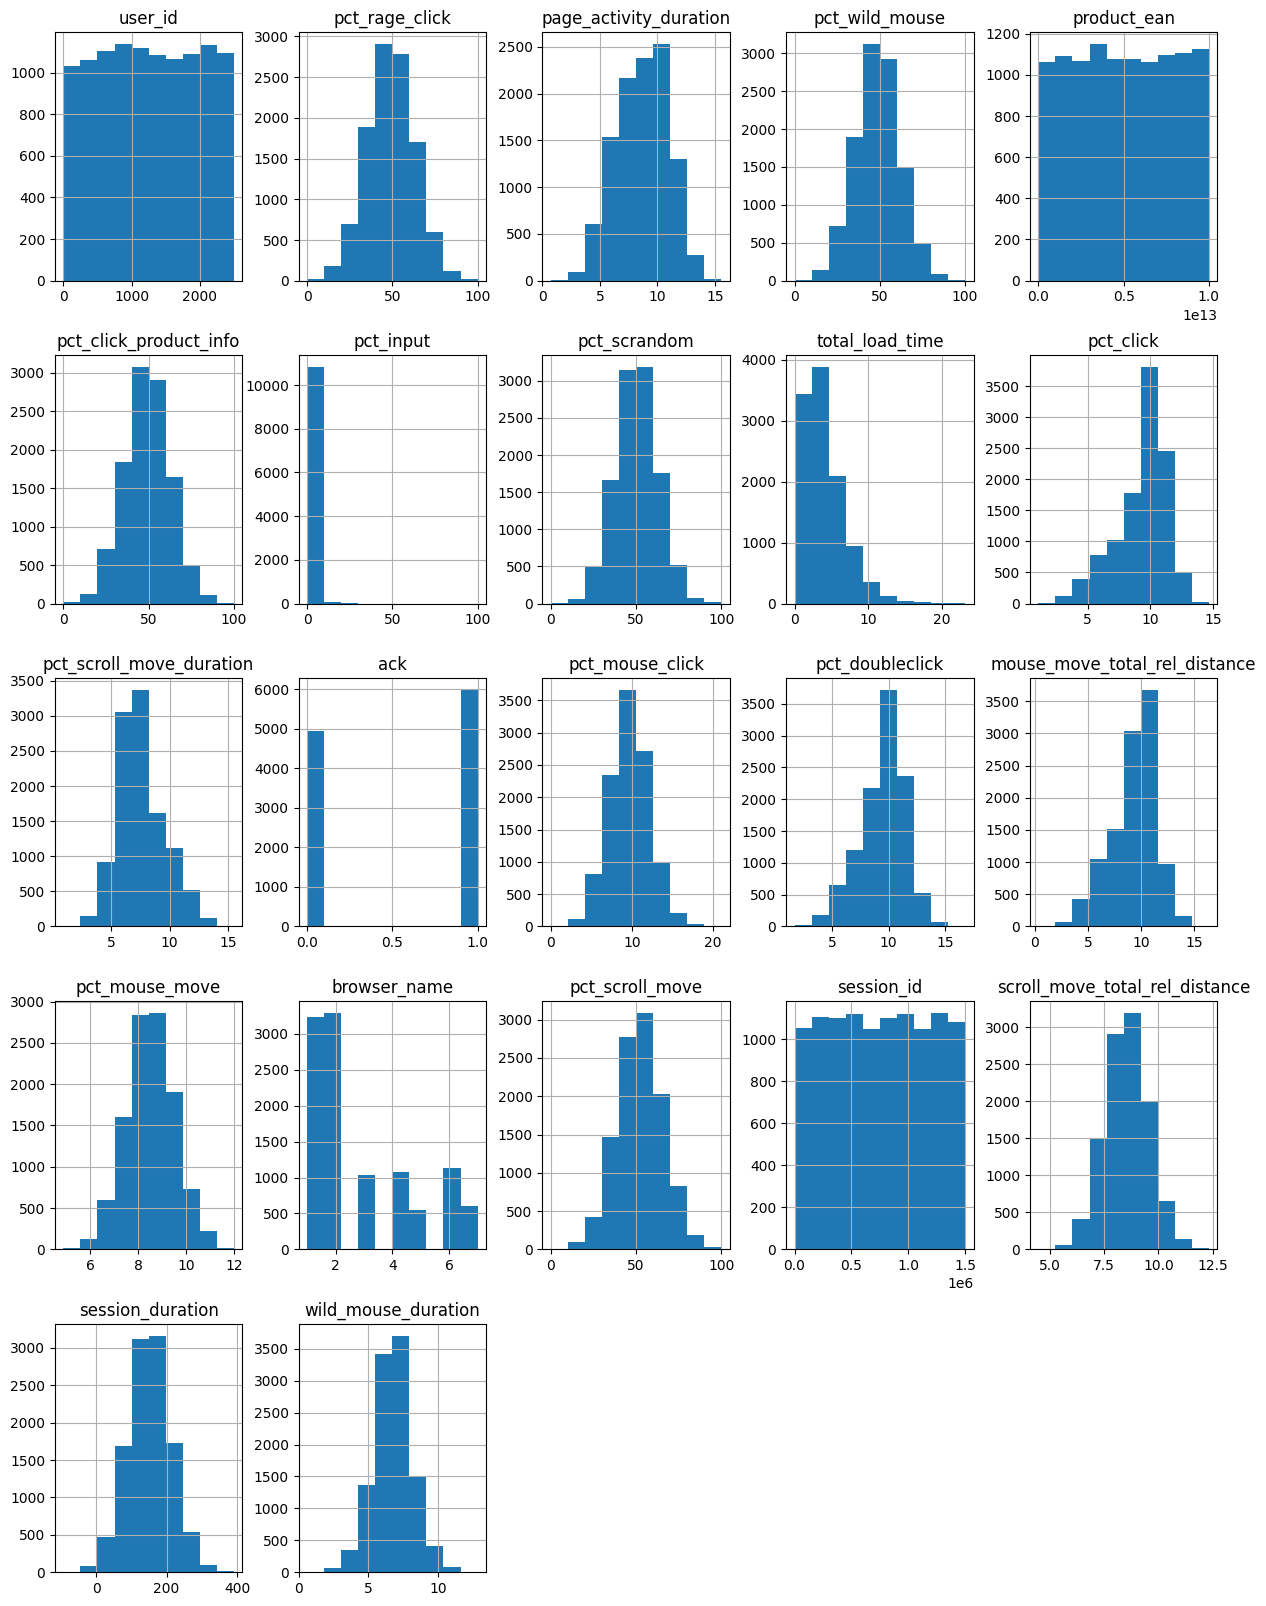

In [126]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
session.hist(ax = ax)

-úpravy vychýlených hodnôt

In [127]:
to_remove = []
to_replace = []
for column in session.columns:
    if column != "ack":
        series = identify_outliers(session[column])
        if len(series) < 100 and len(series) > 0:
            to_remove.append(column)
        else:
            to_replace.append(column)

In [128]:
for column in to_remove:
    session[column] = session[column].drop_duplicates()
    session[column] = remove_outliers(session[column])

In [129]:
for column in to_replace:
    session[column] = replace_outliers(session[column])

Kontrola vychýlených hodnôt po úpravách

In [130]:
for column in session.columns:
    if column != "ack":
        series = identify_outliers(session[column])
        print(f"{column}: {len(series)}")

user_id: 0
pct_rage_click: 0
page_activity_duration: 0
pct_wild_mouse: 0
product_ean: 0
pct_click_product_info: 0
pct_input: 1166
pct_scrandom: 0
total_load_time: 0
pct_click: 0
pct_scroll_move_duration: 0
pct_mouse_click: 0
pct_doubleclick: 0
mouse_move_total_rel_distance: 0
pct_mouse_move: 0
browser_name: 0
pct_scroll_move: 0
session_id: 0
scroll_move_total_rel_distance: 0
session_duration: 0
wild_mouse_duration: 0


Ako môžeme vidieť pri atribúte 
        'pct_input' 
nie je možné riešiť outlier hodnoty, kvôli celkovému rozloženiu dát v atribútoch

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\2222207023.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  session.hist(ax = ax)


array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'pct_mouse_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'browser_name'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'session_id'}>,
   

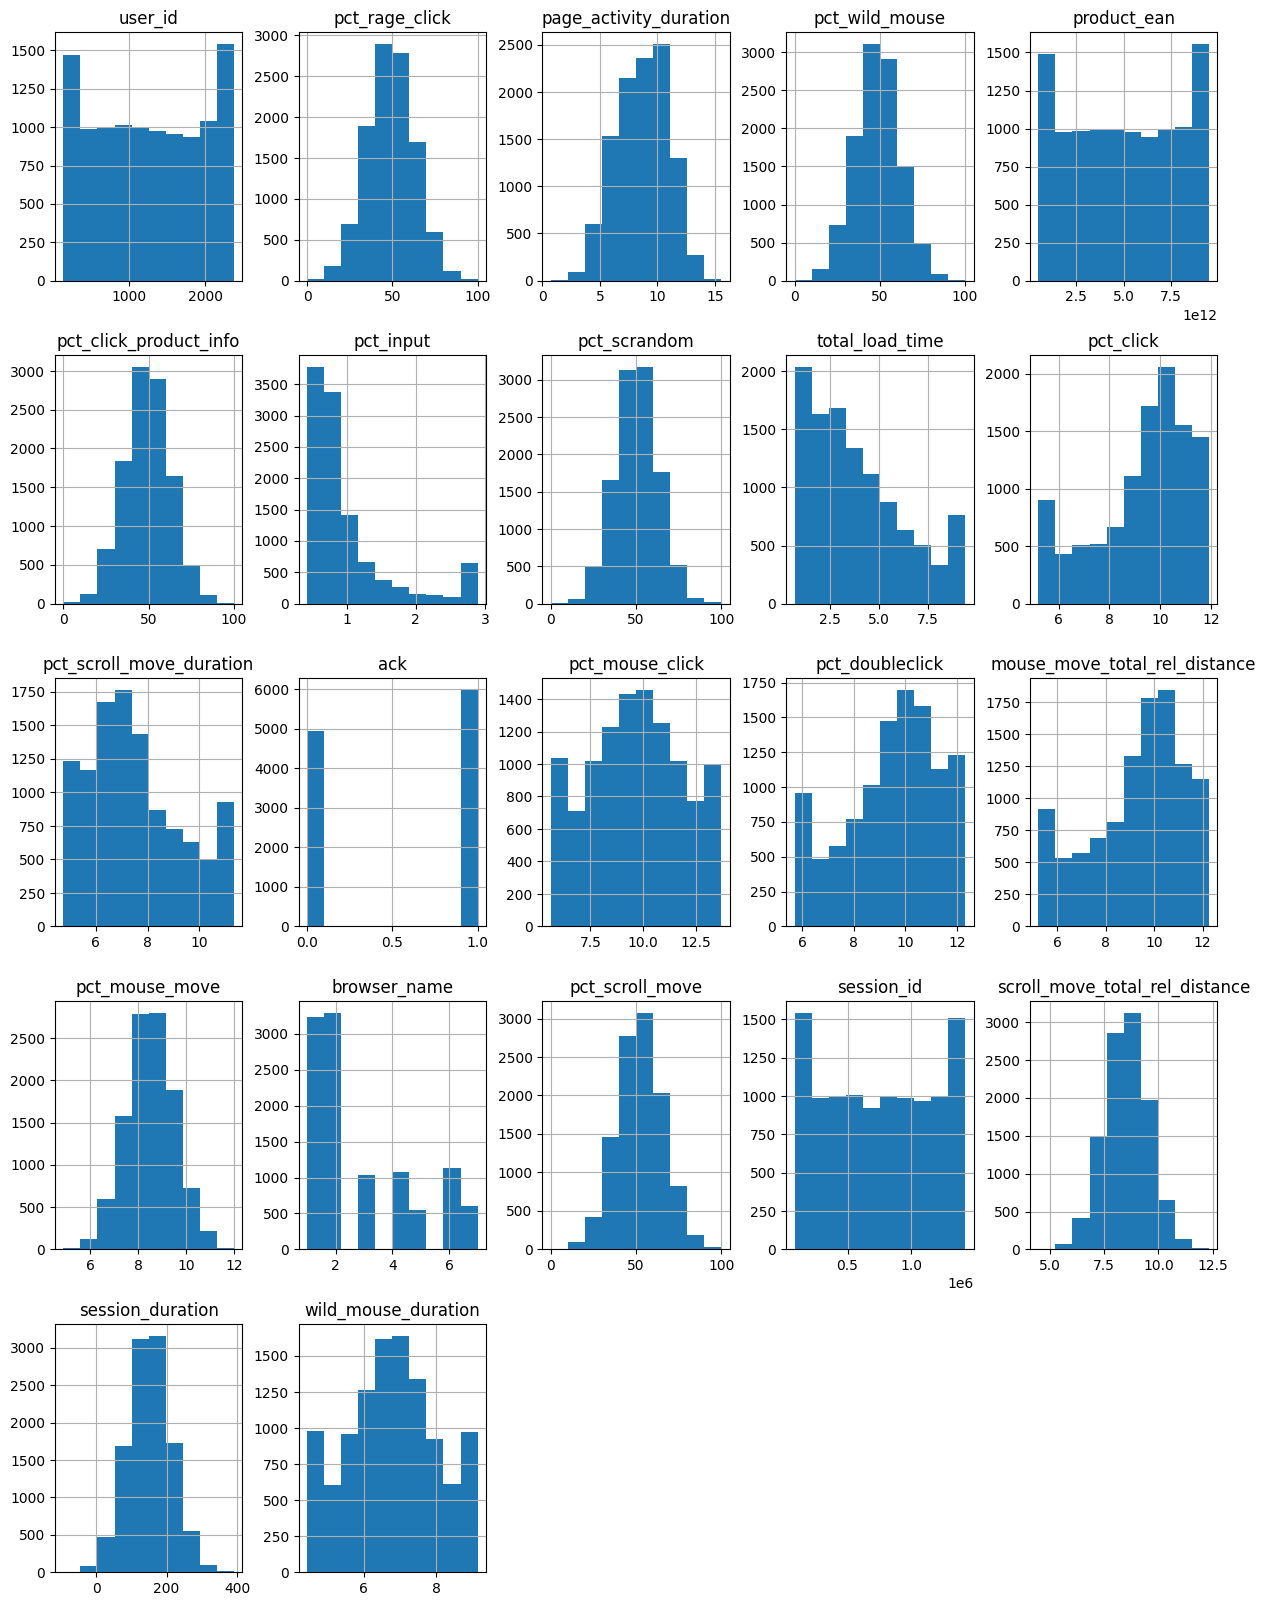

In [131]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
session.hist(ax = ax)

Úprava typov atribútov

In [132]:
session["user_id"] = session["user_id"].astype(int)
session["product_ean"] = session["product_ean"].astype(int)
session["ack"] = session["ack"].astype(int)
session["session_id"] = session["session_id"].astype(int)
session.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10915 entries, 2018-09-23 07:39:19 to 2023-09-22 22:12:30
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         10915 non-null  int32  
 1   pct_rage_click                  10896 non-null  float64
 2   page_activity_duration          10841 non-null  float64
 3   pct_wild_mouse                  10890 non-null  float64
 4   product_ean                     10915 non-null  int32  
 5   pct_click_product_info          10891 non-null  float64
 6   pct_input                       10915 non-null  float64
 7   pct_scrandom                    10896 non-null  float64
 8   total_load_time                 10915 non-null  float64
 9   pct_click                       10915 non-null  float64
 10  pct_scroll_move_duration        10915 non-null  float64
 11  ack                             10915 non-null  int32  
 1

### Realizácia predspracovania dát

Uistíme sa, že naše dáta v datasete session sú správne typy.

In [133]:
session.dtypes

user_id                             int32
pct_rage_click                    float64
page_activity_duration            float64
pct_wild_mouse                    float64
product_ean                         int32
pct_click_product_info            float64
pct_input                         float64
pct_scrandom                      float64
total_load_time                   float64
pct_click                         float64
pct_scroll_move_duration          float64
ack                                 int32
pct_mouse_click                   float64
pct_doubleclick                   float64
mouse_move_total_rel_distance     float64
pct_mouse_move                    float64
browser_name                        int64
pct_scroll_move                   float64
session_id                          int32
scroll_move_total_rel_distance    float64
session_duration                  float64
wild_mouse_duration               float64
dtype: object

Premazanie prázdnych hodnôt

In [134]:
session = session.dropna()

In [135]:
session.isna().sum()

user_id                           0
pct_rage_click                    0
page_activity_duration            0
pct_wild_mouse                    0
product_ean                       0
pct_click_product_info            0
pct_input                         0
pct_scrandom                      0
total_load_time                   0
pct_click                         0
pct_scroll_move_duration          0
ack                               0
pct_mouse_click                   0
pct_doubleclick                   0
mouse_move_total_rel_distance     0
pct_mouse_move                    0
browser_name                      0
pct_scroll_move                   0
session_id                        0
scroll_move_total_rel_distance    0
session_duration                  0
wild_mouse_duration               0
dtype: int64

Rozdelenie setu na trénovací a testovací

In [136]:
training, test = train_test_split(session,train_size=0.75, test_size=0.25,  random_state=42)
print(training["ack"].unique())
print(f"Dĺžka trénovacieho setu: {len(training)}\nDĺžka testovacieho setu: {len(test)}")

[1 0]
Dĺžka trénovacieho setu: 7803
Dĺžka testovacieho setu: 2601


Podľa histogramov sme zistili, že niektoré hodnoty sú z iného ako normálového
rozdelenia, preto sme si rozdelili atribúty podľa distribúcie.


In [137]:
vychylene = ["pct_input", "total_load_time", "pct_click",
              "pct_doubleclick", "pct_scroll_move_duration", "mouse_move_total_rel_distance"]


transformovane = ["ack", "browser_name", "user_id", "product_ean", "session_id"]


normal = ["pct_rage_click", "page_activity_duration", "pct_wild_mouse",
           "pct_click_product_info", "pct_scrandom", "pct_mouse_click",
             "pct_mouse_move", "pct_scroll_move", "scroll_move_total_rel_distance",
               "session_duration", "wild_mouse_duration"]

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\246585188.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[vychylene].hist(ax = ax)


array([[<Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'total_load_time'}>],
       [<Axes: title={'center': 'pct_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>]],
      dtype=object)

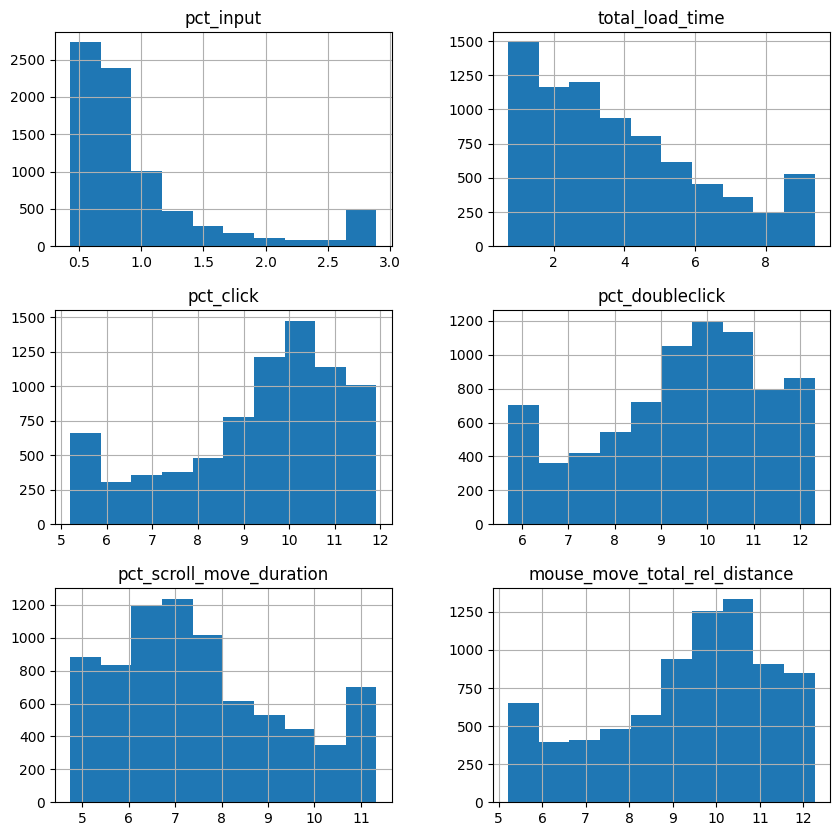

In [138]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
training[vychylene].hist(ax = ax)

Na vychýlené hodnoty použijeme quantilový transformer, pretože majú nepravidelné hodnoty v jednotlivých kvantíloch.

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\2388907835.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[vychylene].hist(ax = ax)


array([[<Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'total_load_time'}>],
       [<Axes: title={'center': 'pct_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>]],
      dtype=object)

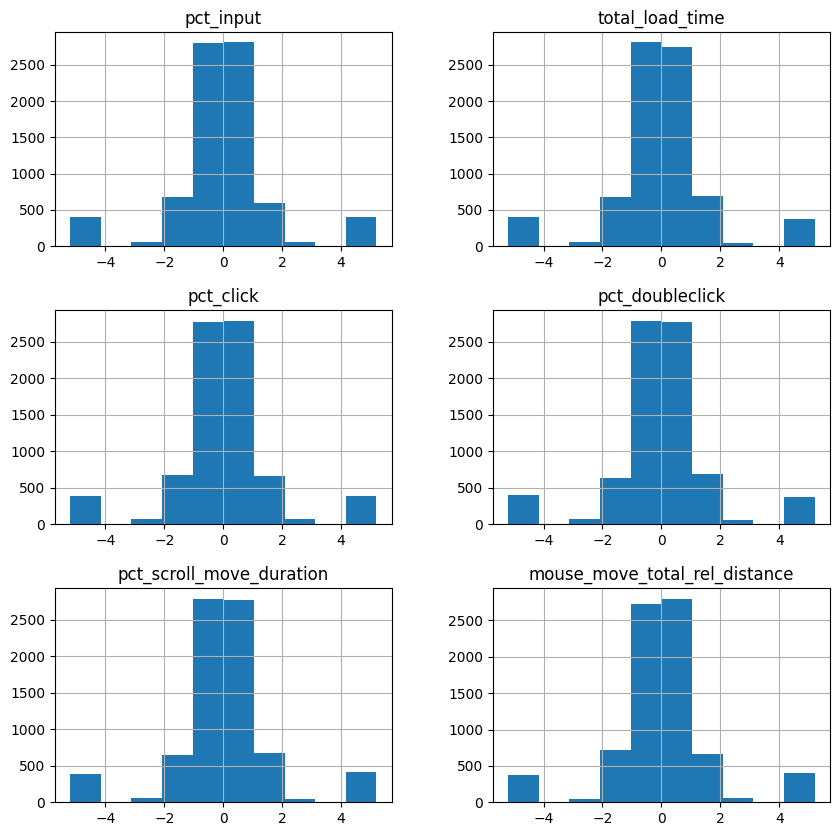

In [139]:
qt = QuantileTransformer(output_distribution="normal", n_quantiles=10)
training[vychylene] = qt.fit_transform(training[vychylene] )
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
training[vychylene].hist(ax = ax)

Tu sú naše transformované hodnoty, ktoré nie je potreba meniť.

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\452895197.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[transformovane].hist(ax = ax)


array([[<Axes: title={'center': 'ack'}>,
        <Axes: title={'center': 'browser_name'}>],
       [<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'product_ean'}>],
       [<Axes: title={'center': 'session_id'}>, <Axes: >]], dtype=object)

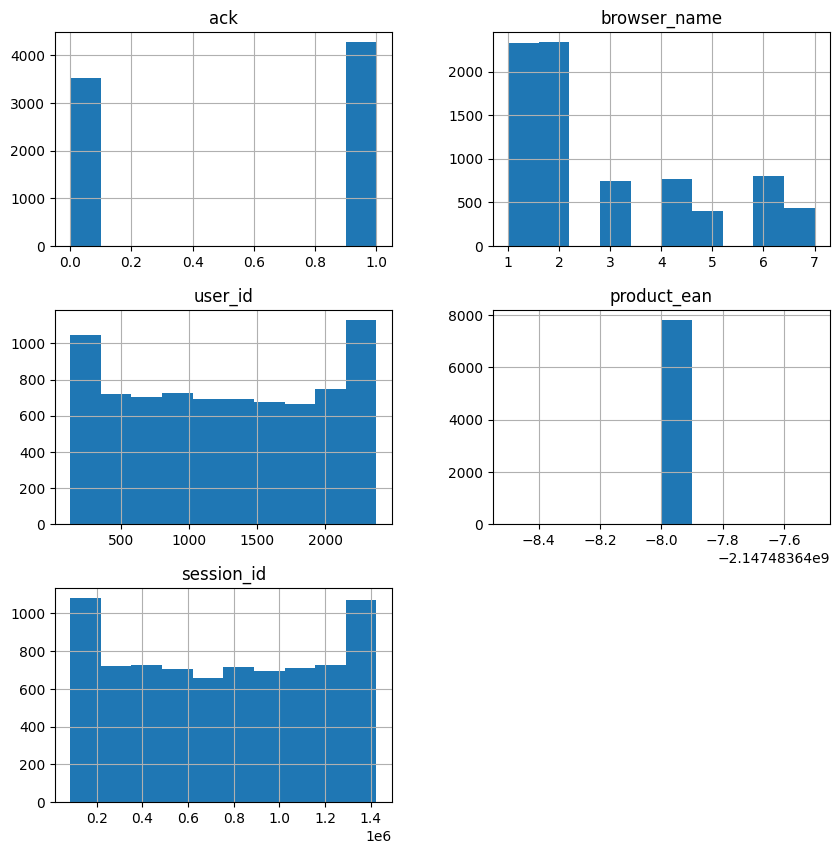

In [140]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
training[transformovane].hist(ax = ax)

Následne ideme na gaussove(normálové) hodnoty

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\3884294998.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[normal].hist(ax = ax)


array([[<Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>,
        <Axes: title={'center': 'pct_wild_mouse'}>],
       [<Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_mouse_click'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>],
       [<Axes: title={'center': 'session_duration'}>,
        <Axes: title={'center': 'wild_mouse_duration'}>, <Axes: >]],
      dtype=object)

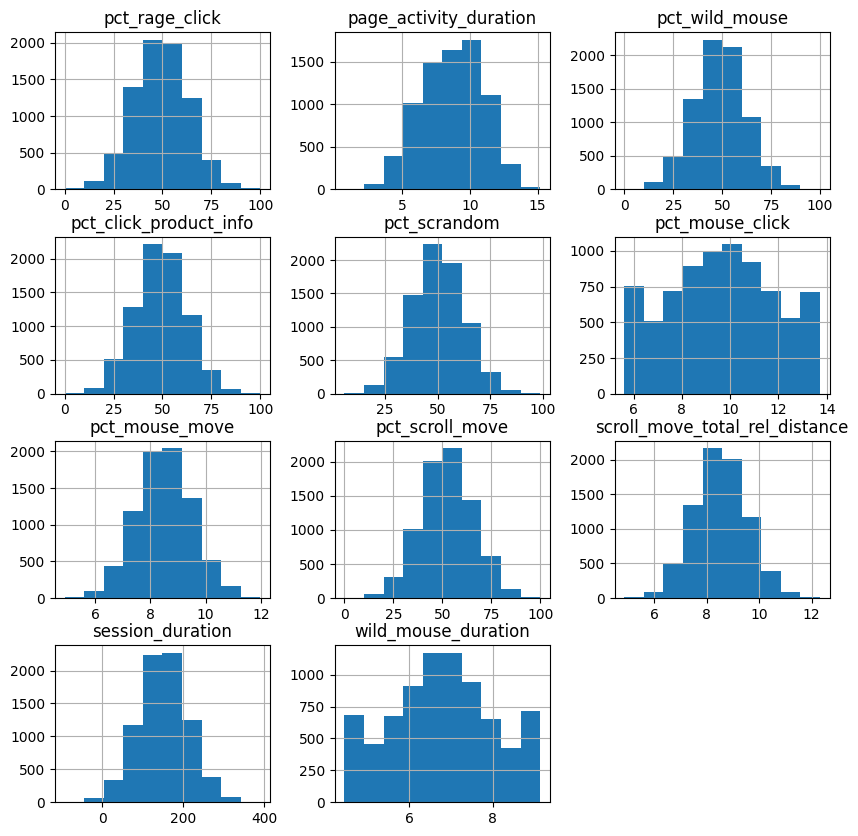

In [141]:
fig = plt.figure(figsize = (10,10))
ax = fig.gca()
training[normal].hist(ax = ax)

Rozhodli sme sa použiť power transformation s metódou Yeo-Johnson,pretože po
odstránení outlierov hodnoty týchto atribútov sú nesymetricky rozdelené.

In [142]:
pt = PowerTransformer(method='yeo-johnson', standardize=True)
training[normal] = pt.fit_transform(training[normal])

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\1273421836.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[processed_data].hist(ax = ax)


array([[<Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>],
       [<Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_mouse_click'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>,
        <Axes: title={'center': 'session_duration'}>],
       [<Axes: title={'center': 'wild_mouse_duration'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

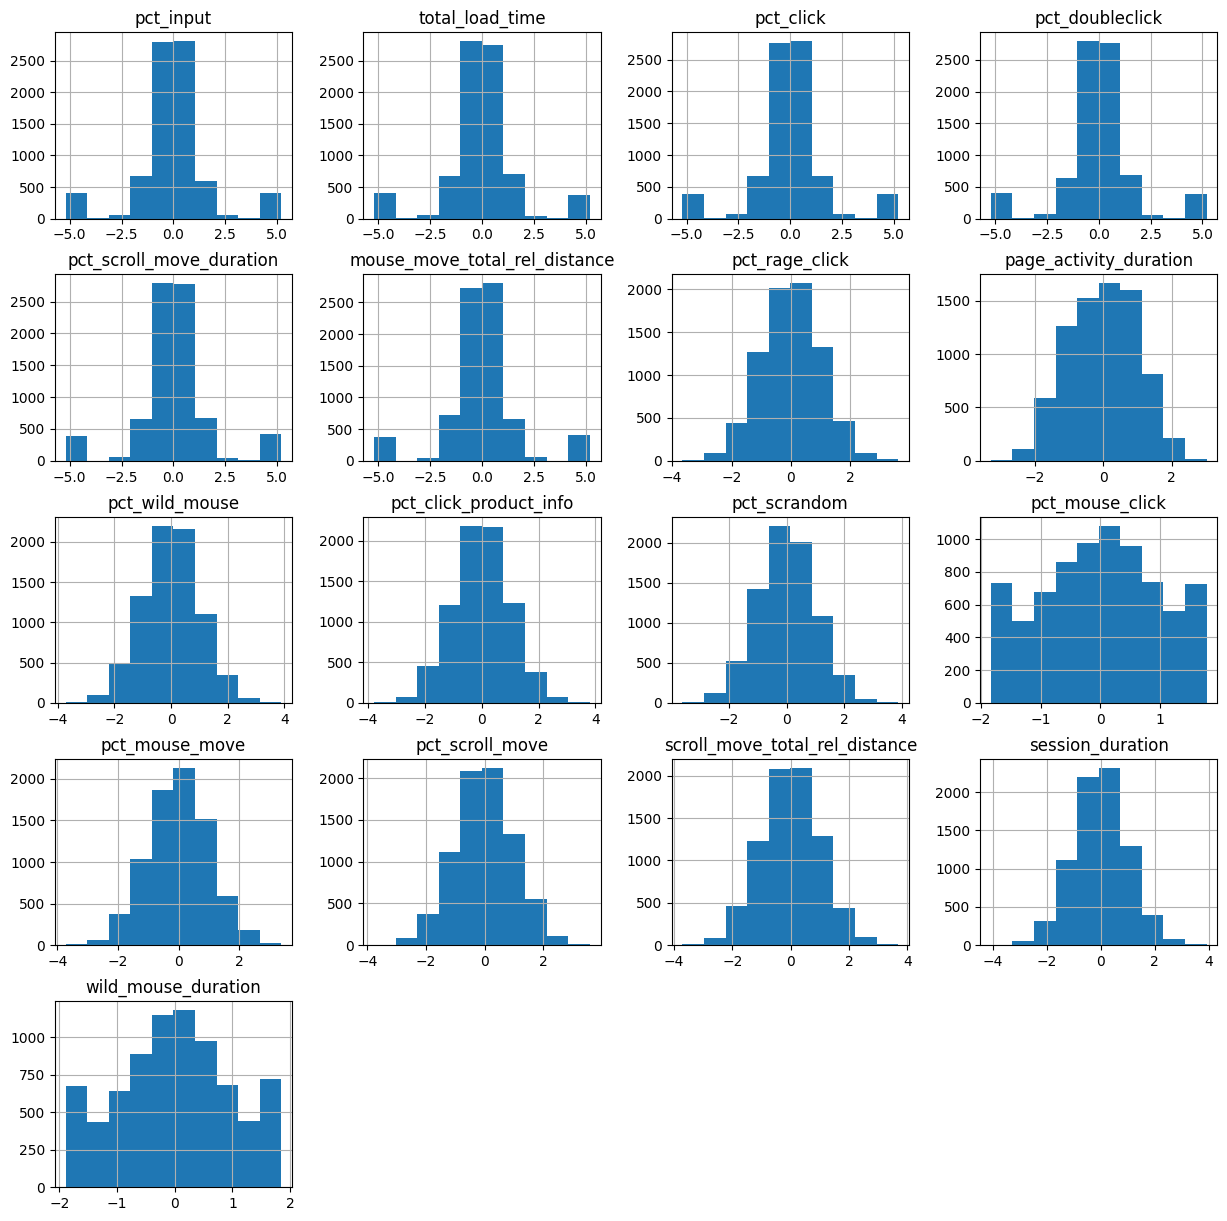

In [143]:
processed_data = vychylene + normal
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
training[processed_data].hist(ax = ax)

A ako posledný krok normalizujeme dáta podla euklidovej normy a využili scaler aby mali hodnotý nulový priemer a rozptyl hodnôt.

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\426737790.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[processed_data].hist(ax = ax)


array([[<Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>],
       [<Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_mouse_click'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>,
        <Axes: title={'center': 'session_duration'}>],
       [<Axes: title={'center': 'wild_mouse_duration'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

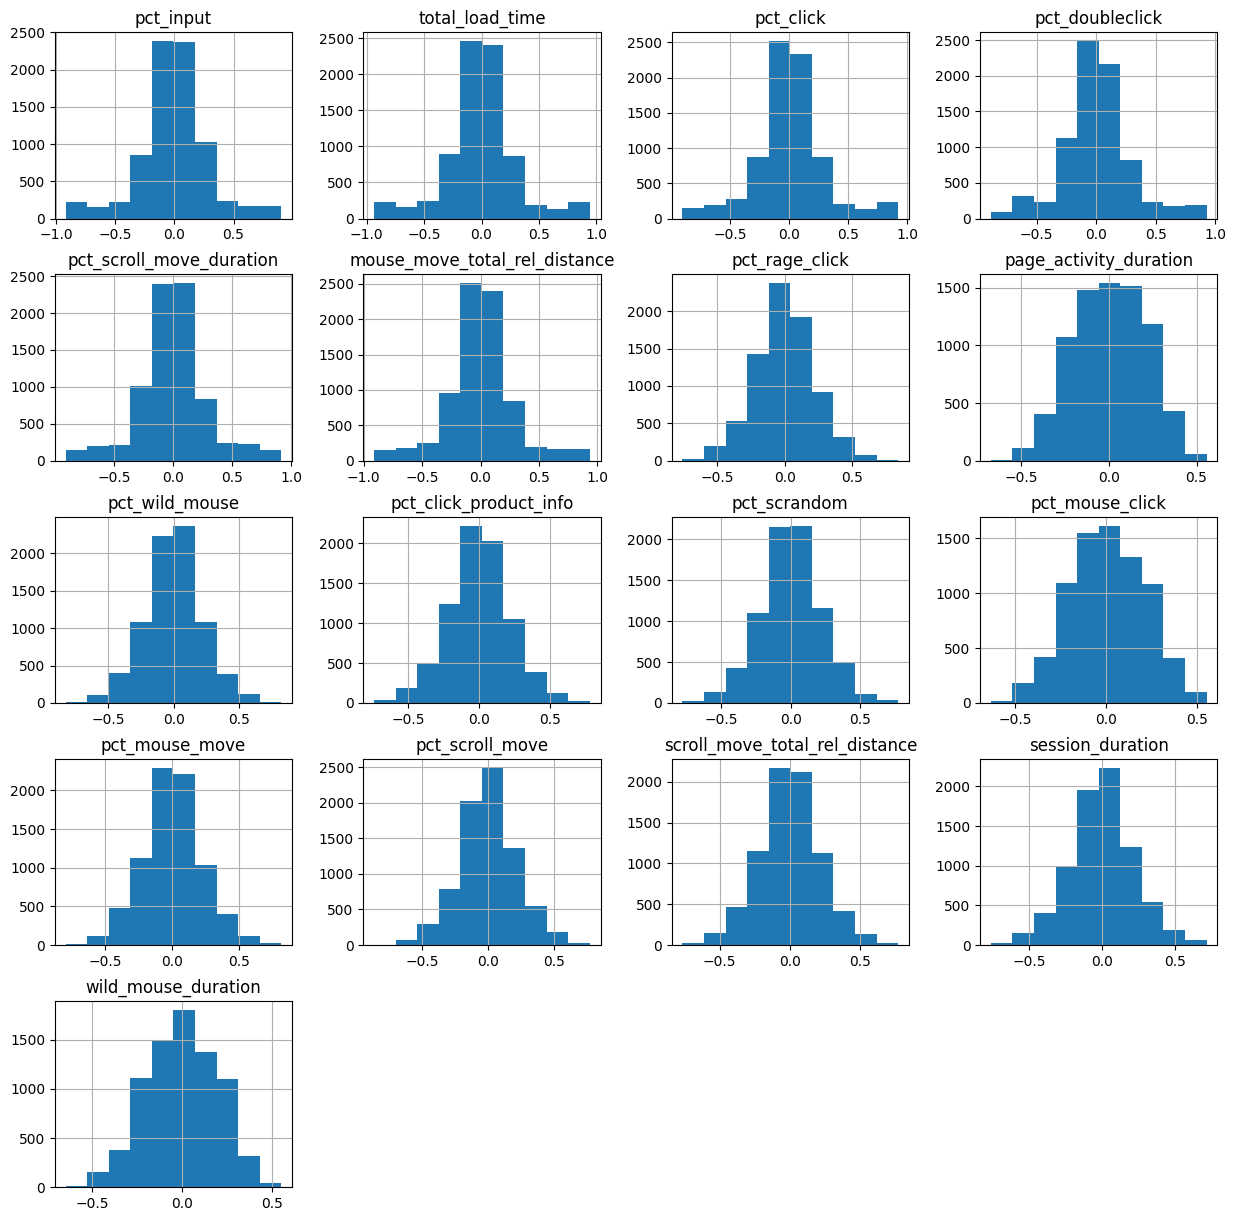

In [144]:
normalizer = Normalizer(norm='l2')
training[processed_data] = normalizer.fit_transform(training[processed_data])
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
training[processed_data].hist(ax = ax)

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\335160755.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  training[processed_data].hist(ax = ax)


array([[<Axes: title={'center': 'pct_input'}>,
        <Axes: title={'center': 'total_load_time'}>,
        <Axes: title={'center': 'pct_click'}>,
        <Axes: title={'center': 'pct_doubleclick'}>],
       [<Axes: title={'center': 'pct_scroll_move_duration'}>,
        <Axes: title={'center': 'mouse_move_total_rel_distance'}>,
        <Axes: title={'center': 'pct_rage_click'}>,
        <Axes: title={'center': 'page_activity_duration'}>],
       [<Axes: title={'center': 'pct_wild_mouse'}>,
        <Axes: title={'center': 'pct_click_product_info'}>,
        <Axes: title={'center': 'pct_scrandom'}>,
        <Axes: title={'center': 'pct_mouse_click'}>],
       [<Axes: title={'center': 'pct_mouse_move'}>,
        <Axes: title={'center': 'pct_scroll_move'}>,
        <Axes: title={'center': 'scroll_move_total_rel_distance'}>,
        <Axes: title={'center': 'session_duration'}>],
       [<Axes: title={'center': 'wild_mouse_duration'}>, <Axes: >,
        <Axes: >, <Axes: >]], dtype=object)

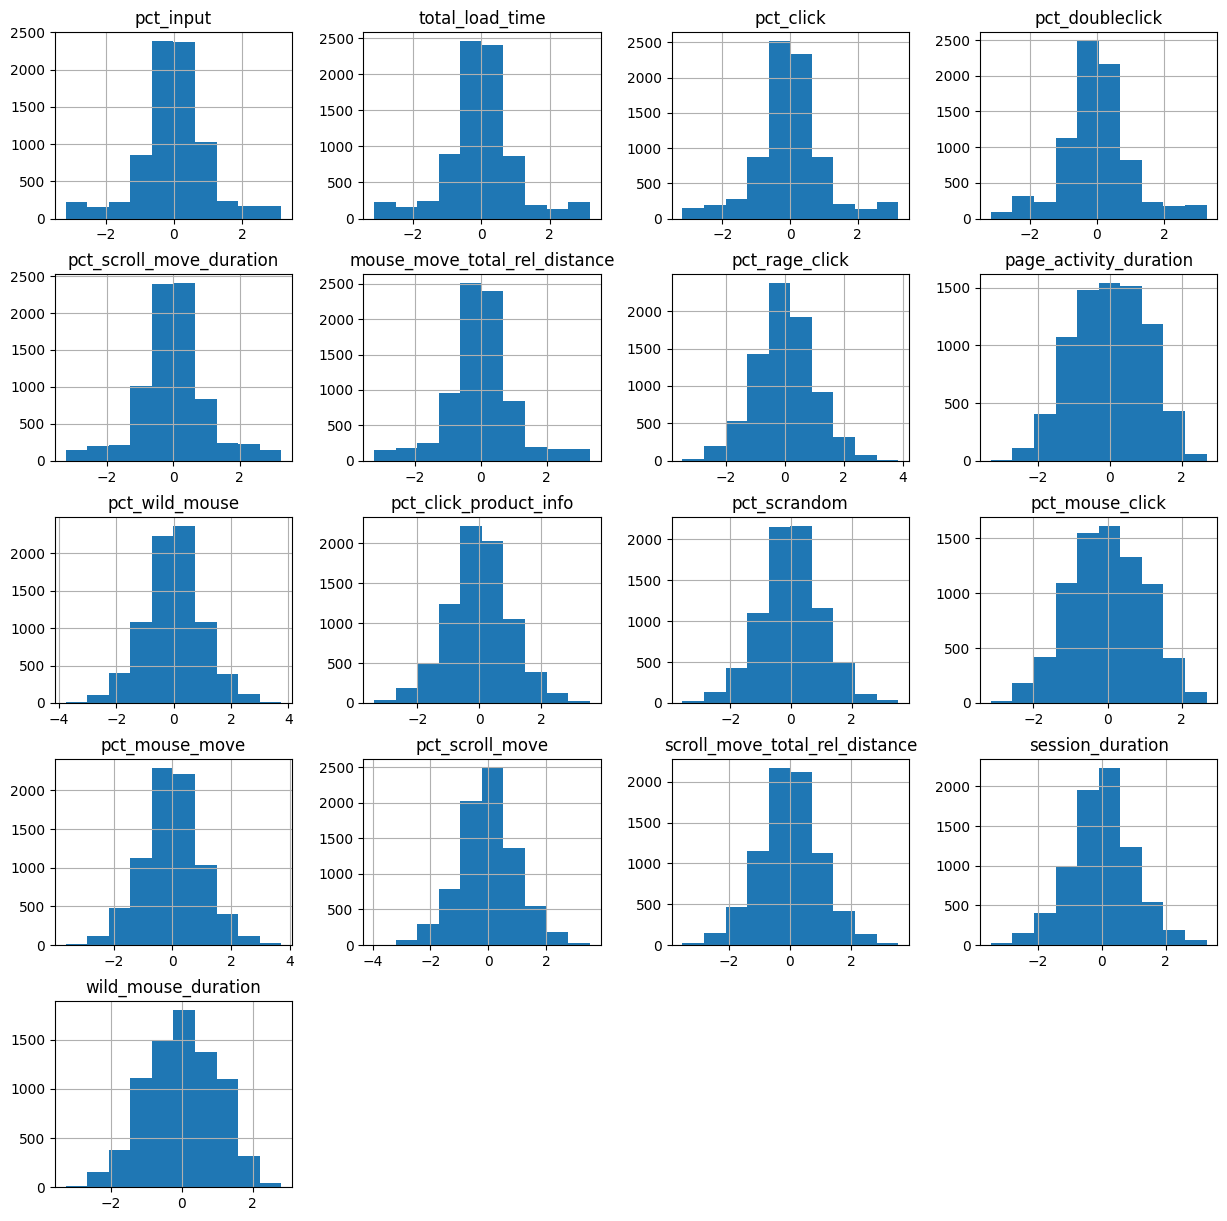

In [145]:
standard_scaler = StandardScaler()
training[processed_data] = standard_scaler.fit_transform(training[processed_data])
fig = plt.figure(figsize = (15,15))
ax = fig.gca()
training[processed_data].hist(ax = ax)

### Tu si vytvoríme pipeline so všetkými krokmi (Replikovateľnosť predspracovania)


In [146]:
pipeline = make_pipeline(QuantileTransformer(output_distribution="normal", n_quantiles=10), PowerTransformer(method='yeo-johnson', standardize=True), Normalizer(norm='l2'), StandardScaler())
pipeline.fit(training)



Pipeline(steps=[('quantiletransformer',
                 QuantileTransformer(n_quantiles=10,
                                     output_distribution='normal')),
                ('powertransformer', PowerTransformer()),
                ('normalizer', Normalizer()),
                ('standardscaler', StandardScaler())])

In [147]:
# Assuming 'ack' is the column you want to exclude from transformation
from numpy import int32
from sklearn.compose import ColumnTransformer


numeric_features = training.drop('ack', axis=1).columns
non_numeric_features = ['ack']

# Define the pipeline for numeric features
numeric_transformer = make_pipeline(
    QuantileTransformer(output_distribution="normal", n_quantiles=10),
    PowerTransformer(method='yeo-johnson', standardize=True),
    Normalizer(norm='l2'),
    StandardScaler()
)

# Combine transformers using ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('numeric', numeric_transformer, numeric_features),
        ('non_numeric', 'passthrough', non_numeric_features)
    ]
)

# Fit and transform the data
transformed_data = preprocessor.fit_transform(training)

# Convert the transformed data back to a DataFrame
numeric_columns = numeric_features.tolist()  # Convert Index to list
training_DF = pd.DataFrame(transformed_data, columns=numeric_columns + non_numeric_features)
training_DF["ack"] = training_DF["ack"].astype(int32)
training_DF["ack"].unique()

array([1, 0])

### Výber atribútov pre strojové učenie


<Axes: >

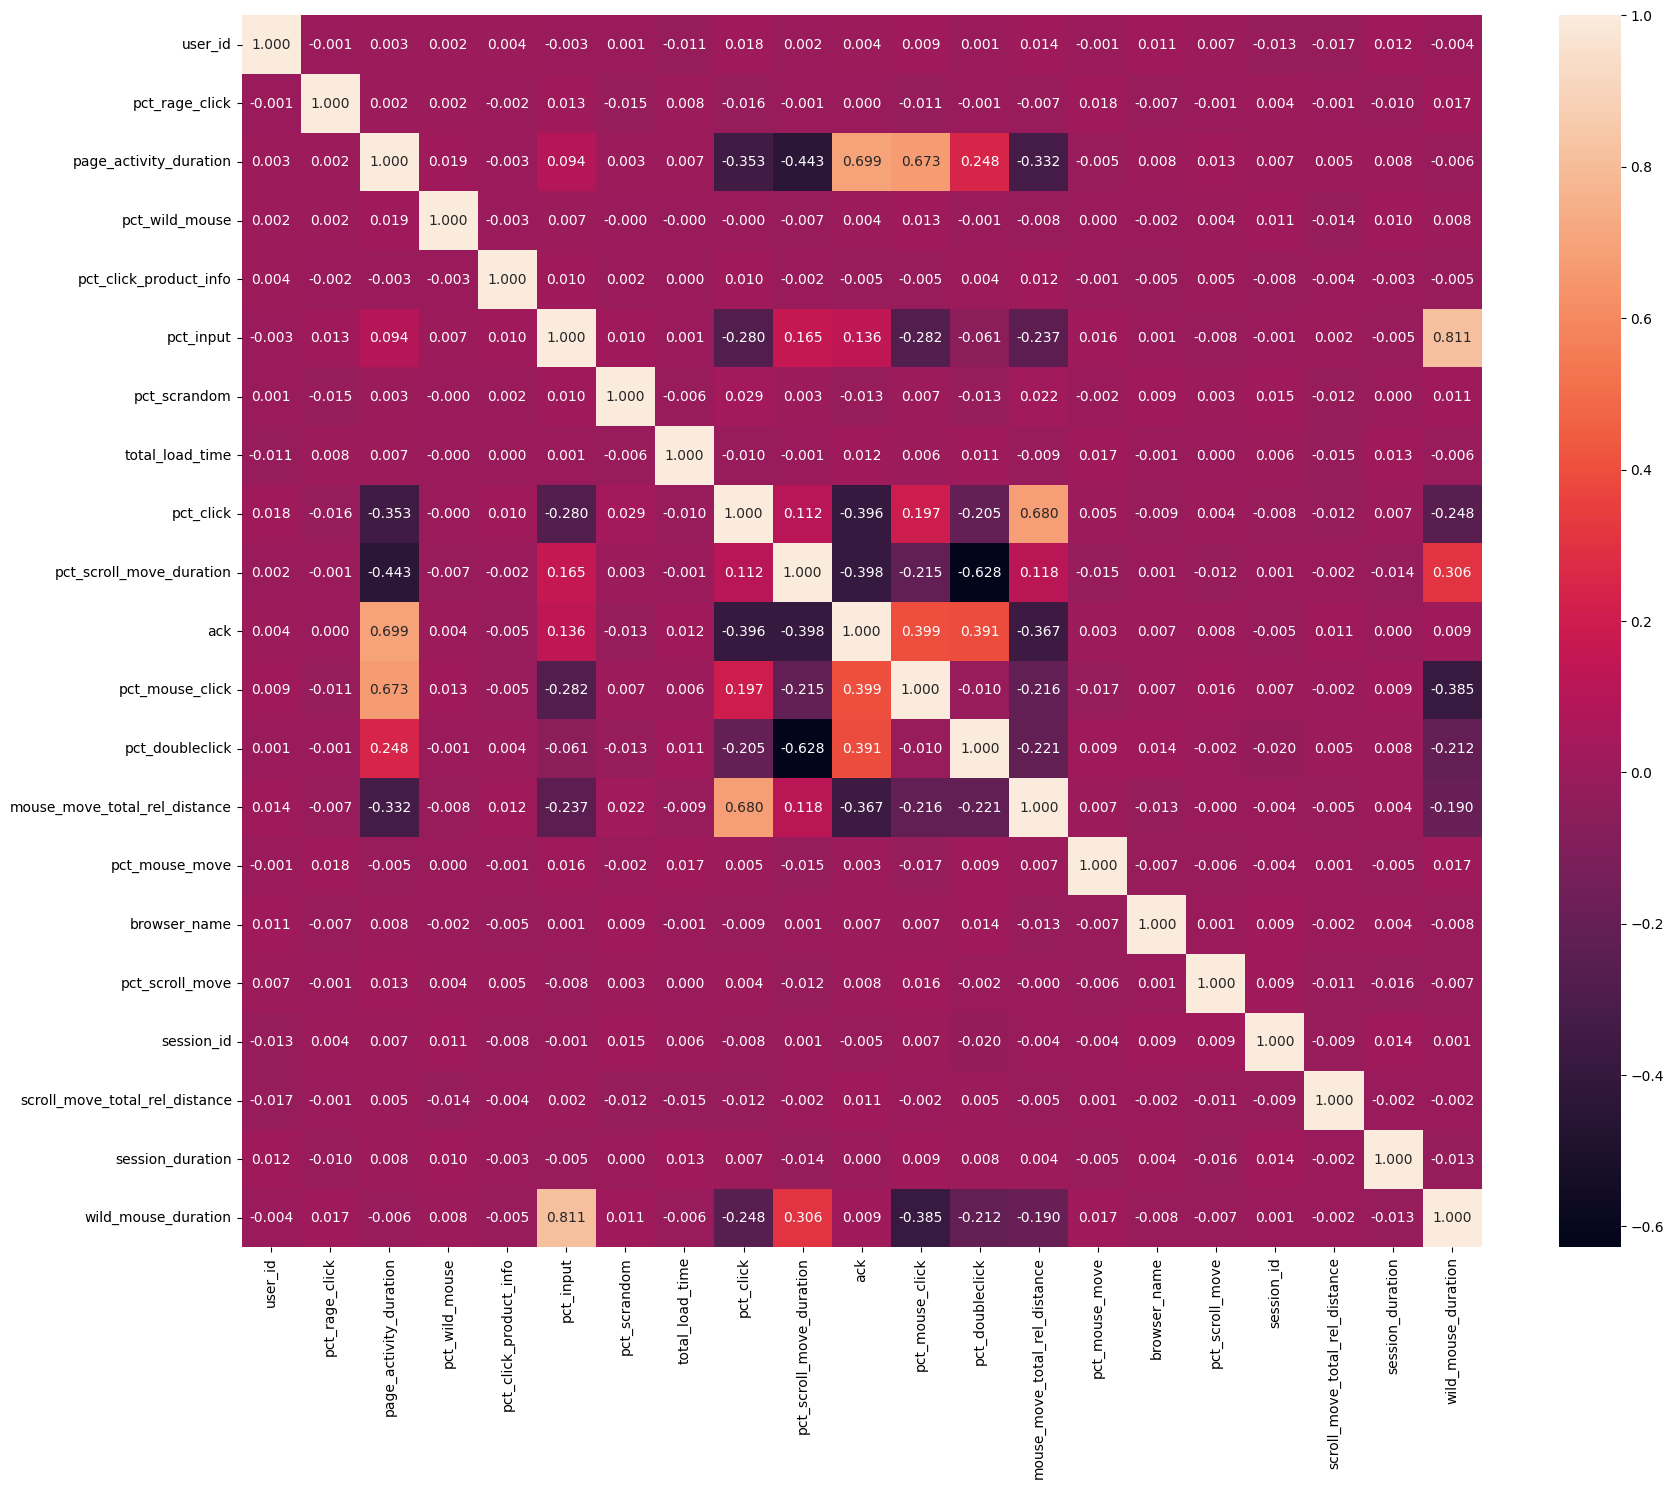

In [148]:
figure, ax = plt.subplots(figsize=(20,16))
session_sub = session.copy()
session_sub.drop('product_ean',axis = 1,inplace=True)
sns.heatmap(session_sub.corr(),ax=ax, annot =True, fmt = ".3f")

<Axes: >

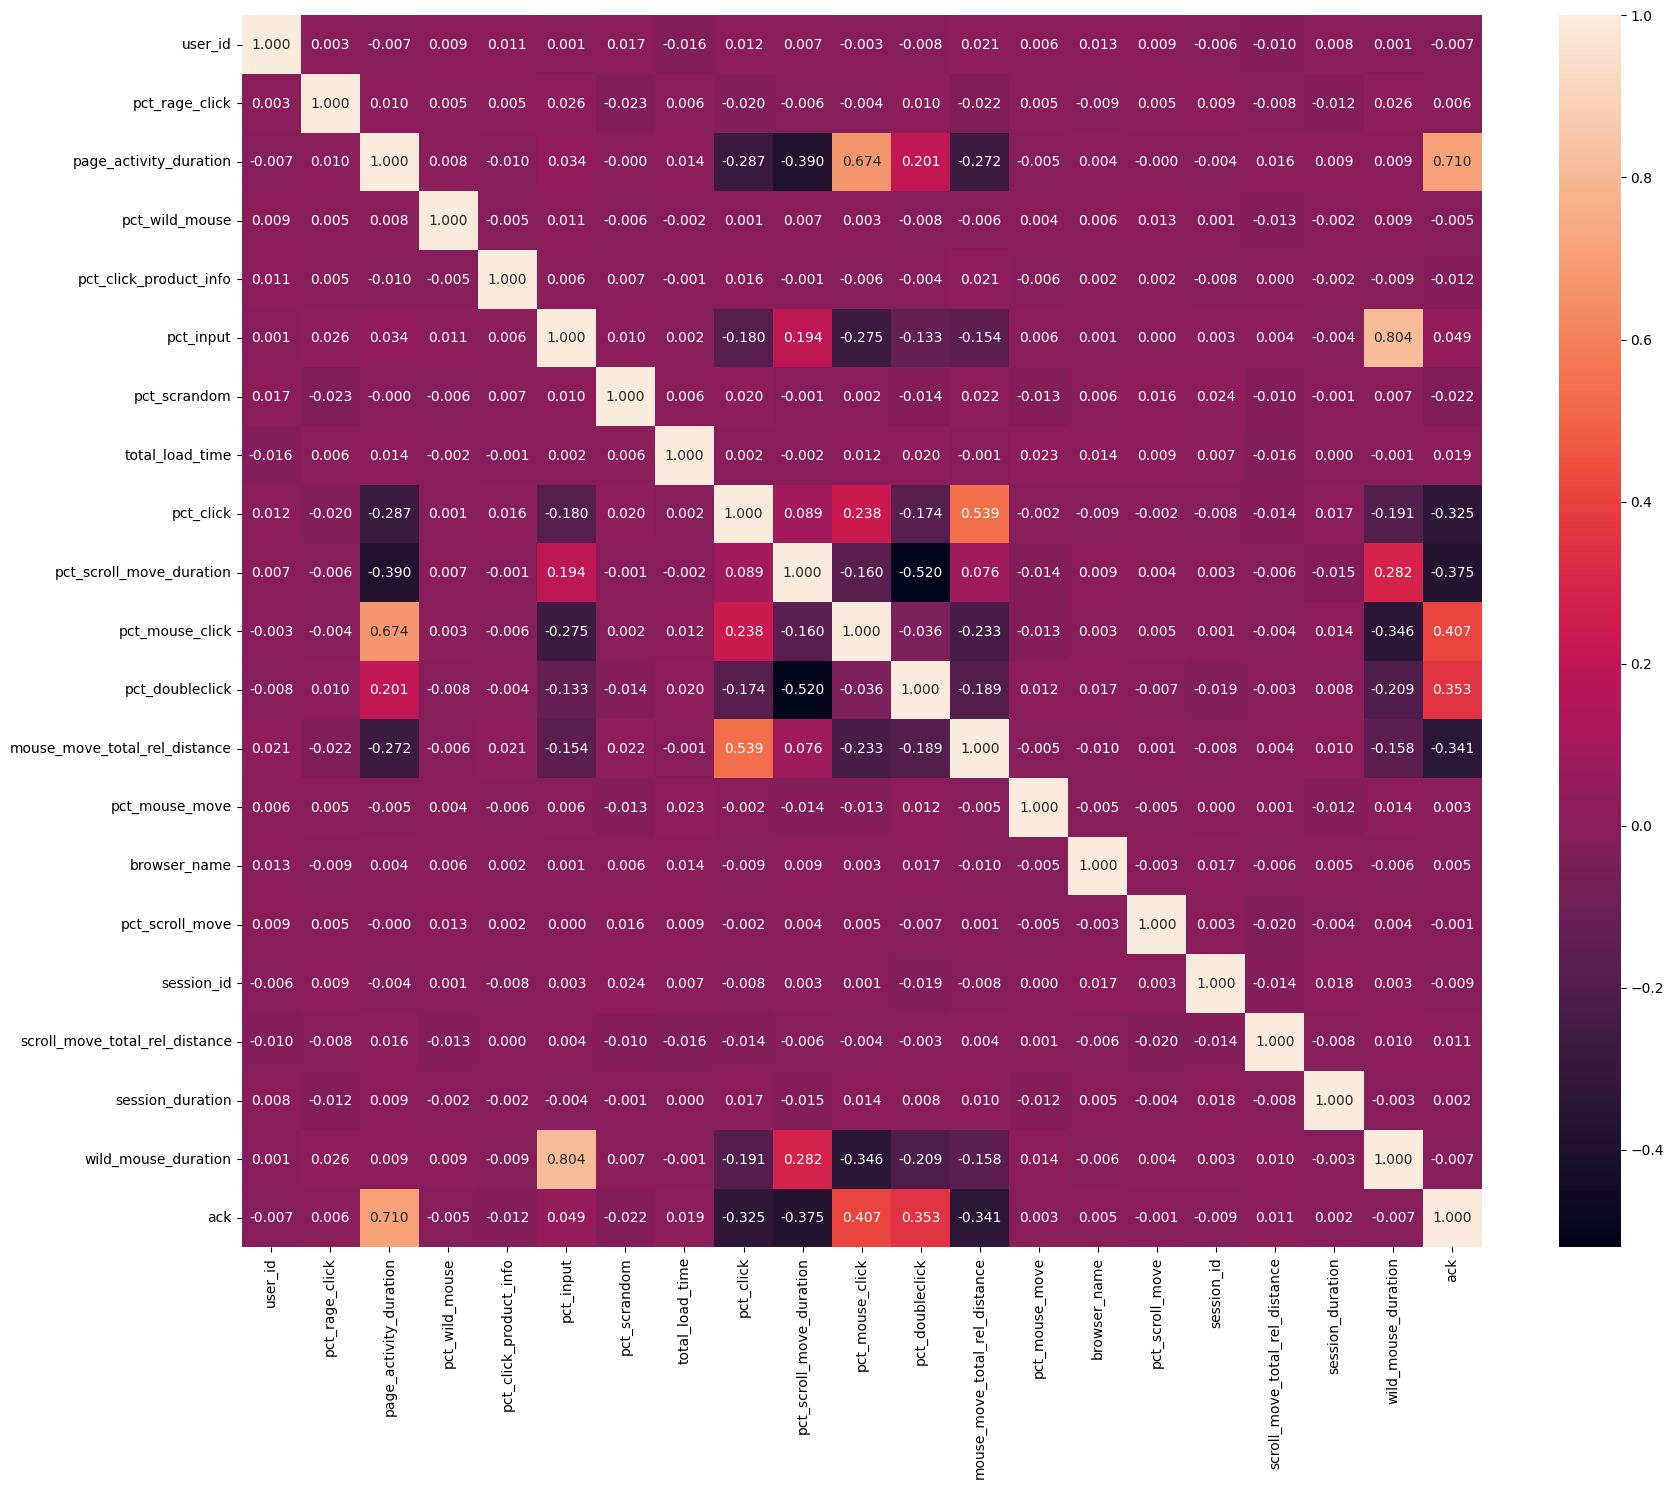

In [149]:
figure, ax = plt.subplots(figsize=(20,16))
training_sub = training_DF.copy()
training_sub.drop('product_ean',axis = 1,inplace=True)
sns.heatmap(training_sub.corr(),ax=ax, annot =True, fmt = ".3f")

In [150]:
cor_target = abs(training_DF.corr()["ack"])
cor_target.sort_values(ascending=False)

ack                               1.000000
page_activity_duration            0.709757
pct_mouse_click                   0.406507
pct_scroll_move_duration          0.375335
pct_doubleclick                   0.352502
mouse_move_total_rel_distance     0.340854
pct_click                         0.324978
pct_input                         0.048519
pct_scrandom                      0.022361
total_load_time                   0.018503
pct_click_product_info            0.011624
scroll_move_total_rel_distance    0.010705
session_id                        0.008904
user_id                           0.007201
wild_mouse_duration               0.006715
pct_rage_click                    0.006364
browser_name                      0.005259
pct_wild_mouse                    0.004601
pct_mouse_move                    0.003425
session_duration                  0.001933
pct_scroll_move                   0.001108
product_ean                            NaN
Name: ack, dtype: float64

C:\Users\Lukáš\AppData\Local\Temp\ipykernel_14776\3108562550.py:4: RuntimeWarning: divide by zero encountered in log10
  scores = -np.log10(selector.pvalues_)


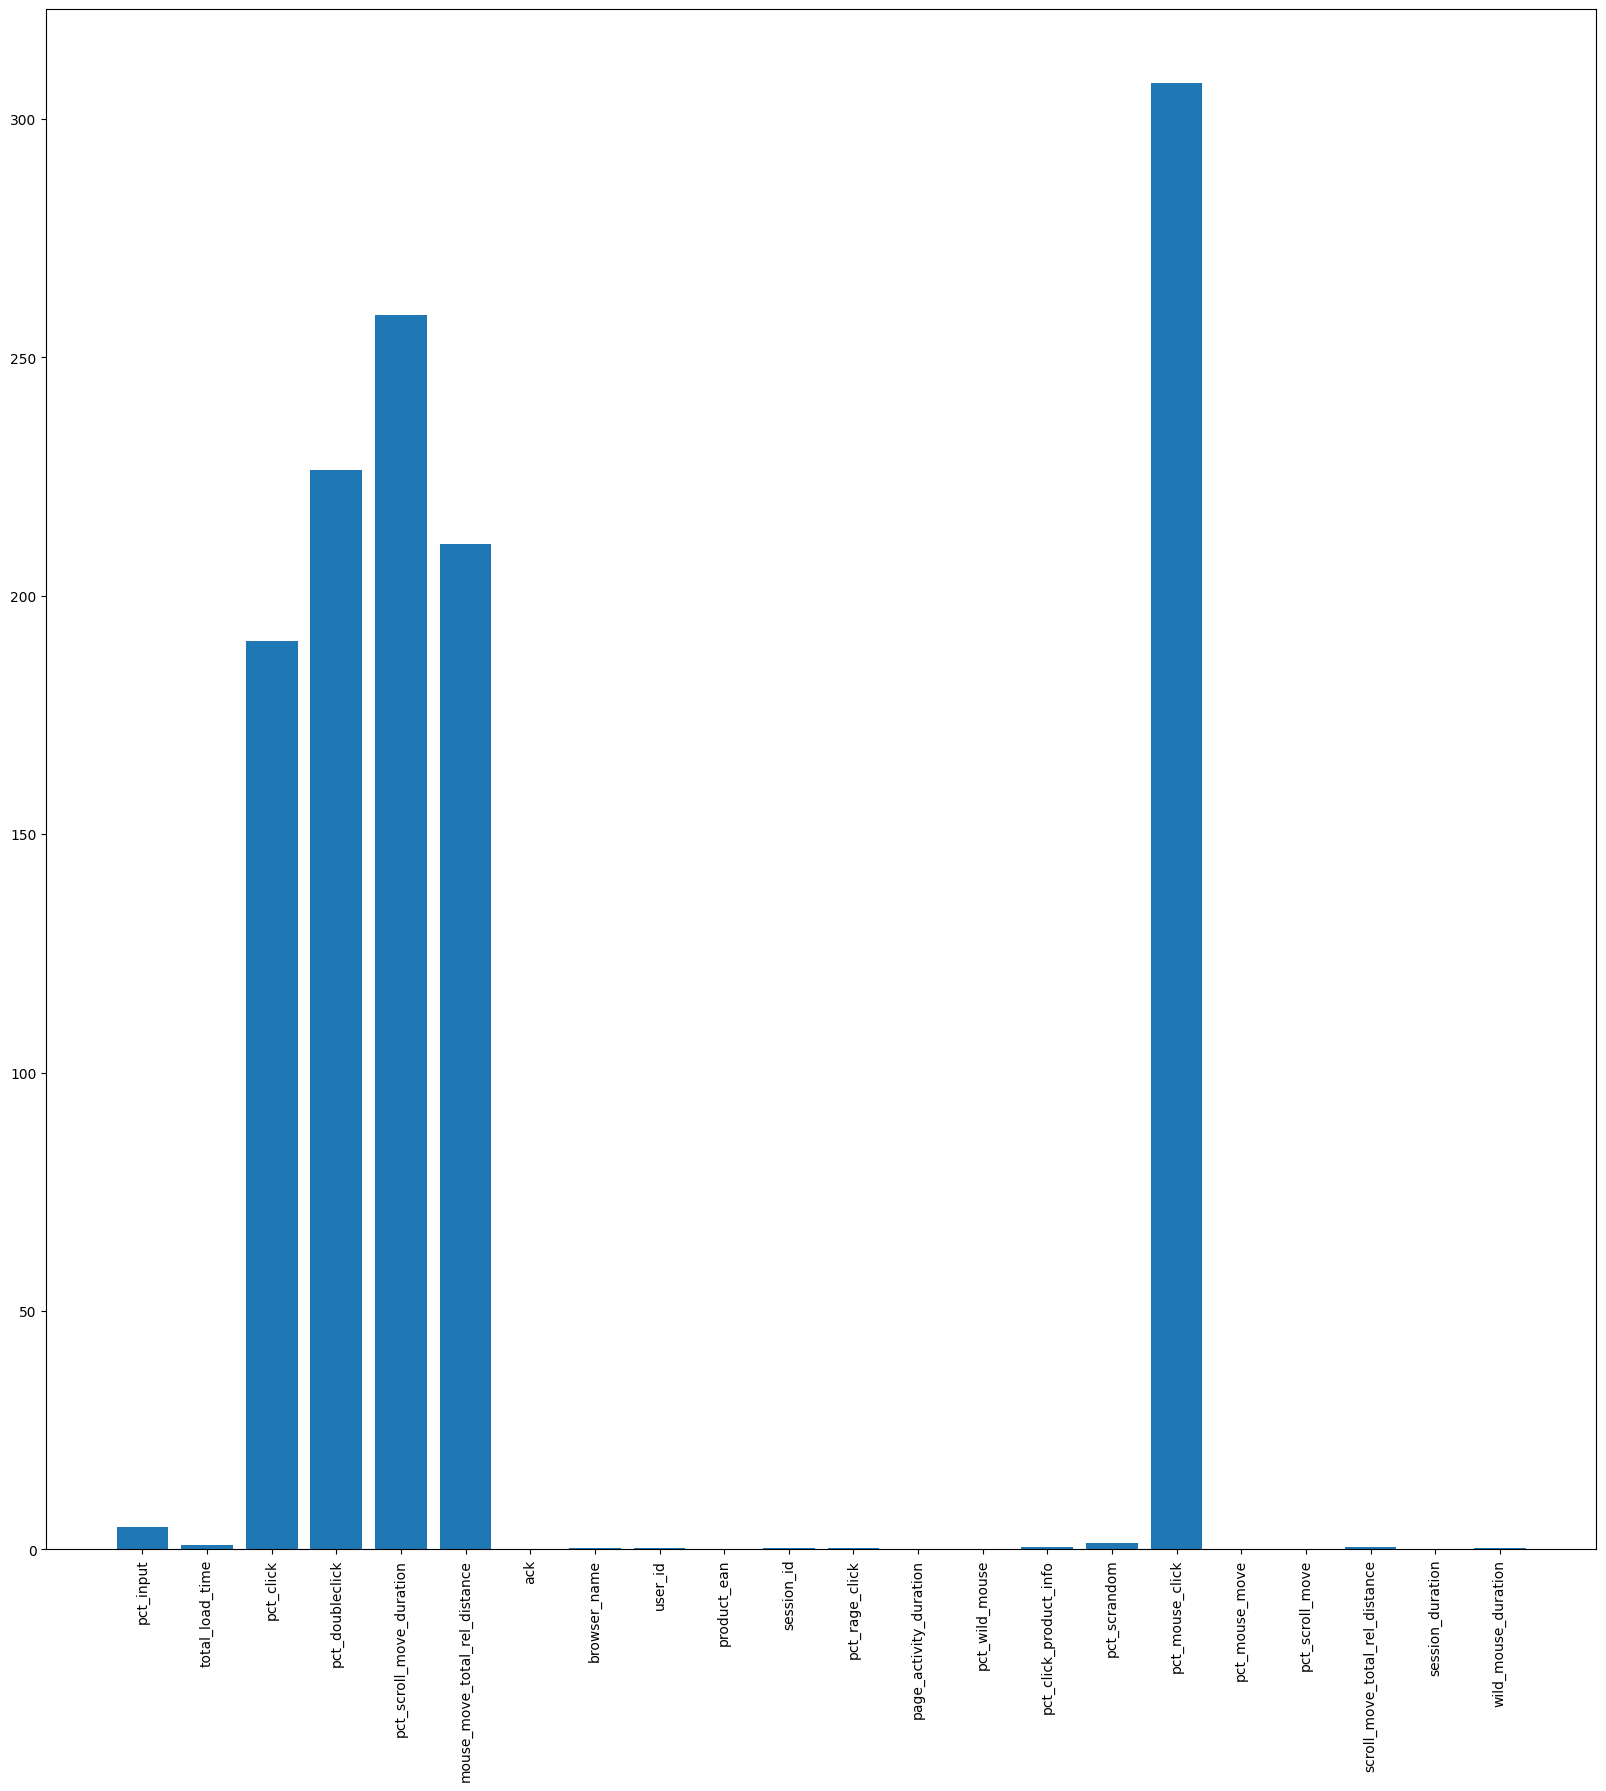

In [151]:
all= vychylene + transformovane + normal
selector = SelectKBest(f_regression, k=17)
selector.fit_transform(training_DF[all], training_DF["ack"])
scores = -np.log10(selector.pvalues_)
plt.figure(figsize=(20, 20))
plt.bar(range(len(all)), scores)
plt.xticks(range(len(all)), all, rotation='vertical')
plt.show()


- Výstupom je teda dataset určený na strojové učenie. Dataset má trénovaciu a testovaciu časť.

- Podľa grafu korelácií vyššie vieme vyhodnotiť, že hodnoty ktoré informujú o predikovanej premennej sú:
    - pct_click
    - pct_doubleclick
    - pct_scroll_move_duration
    - mouse_move_total_rel_distance
    - pct_mouse_click

In [152]:
training_DF.to_csv('data/training_DF.csv')

In [153]:
test.to_csv('data/test_DF.csv')

### Fáza 3 - Strojové učenie

Autori: Lukáš Lovás(50%), Daniel Lendvorský(50%)

Dátum: 12.12.2023

In [154]:

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree, metrics
from pandas import read_csv
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from sklearn.model_selection import RandomizedSearchCV
from matplotlib import pyplot
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files/Graphviz/bin/'
import graphviz 

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import validation_curve
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.svm import SVR
from sklearn.feature_selection import VarianceThreshold

    Jednoduchý klasifikátor na základe závislosti v dátach

In [155]:
train_filename="data/training_DF.csv"
training_DF = pd.read_csv(train_filename, sep=',')
test_filename="data/test_DF.csv"
test = pd.read_csv(test_filename, sep=',')

training_DF.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)
test.drop(['Unnamed: 0'], axis=1, errors='ignore', inplace=True)


OneR algorithm

Vytvorili sme si oneR algoritmus aby sme zistili, stĺpec s najlepšími metrickými hodnotami.

Predpokladáme, že po aplikovaní oneR algoritmu na náš dataset, že atribúty s najlepšími metrikami budú atribúty ktoré mali v našich dátach najvyššiu koreláciu k atribútu ack.

In [156]:
training_DF.head()

user_id  pct_rage_click  page_activity_duration  pct_wild_mouse  \
0  0.419628        1.210134                0.562774       -1.193400   
1  0.682807        0.425391                0.723452        0.096528   
2 -0.006841        1.159822               -0.672141        0.611725   
3  0.724076        1.284073               -0.959823       -0.382544   
4  0.267596       -0.478378               -0.025911        0.712219   

   product_ean  pct_click_product_info  pct_input  pct_scrandom  \
0          0.0                0.719931  -0.196166     -0.618039   
1          0.0                0.622020  -0.323114     -0.337329   
2          0.0               -0.532002  -0.430775      1.360411   
3          0.0               -0.277922  -0.529117     -0.272492   
4          0.0               -1.453463   0.415181      0.211083   

   total_load_time  pct_click  ...  pct_doubleclick  \
0        -1.936354  -0.577145  ...        -0.188874   
1         2.071757   0.449270  ...        -0.074100   
2        -0.534675   0.988673  ...        -1.157448   
3        -0.625737   0.612702  ...         2.008335   
4        -0.215705   0.992251  ...        -2.441262   

   mouse_move_total_rel_distance  pct_mouse_move  browser_name  \
0                      -1.200612        0.120397     -1.254114   
1                       0.134170       -0.238898      2.238850   
2                       1.031703        1.493813      0.465839   
3                       2.047429       -1.768006      0.243661   
4                       2.332264       -0.623771      0.266003   

   pct_scroll_move  session_id  scroll_move_total_rel_distance  \
0        -0.430028   -2.879672                        0.514827   
1         0.501711   -2.652655                        0.518528   
2         1.286995   -2.608156                        1.145158   
3        -0.583818    0.022998                        0.338292   
4         1.448215   -0.224533                        0.199945   

   session_duration  wild_mouse_duration  ack  
0          0.113104             0.285839    1  
1          0.931899            -0.468040    1  
2          0.771096             0.017115    0  
3          0.384632            -1.532074    1  
4          0.617247             0.322961    0  

[5 rows x 22 columns]

In [157]:
oneR_training_DF = training_DF.select_dtypes(include='number').copy()
oneR_training_DF.drop(["user_id", "product_ean"], axis=1, inplace=True)
oneR_training_DF["ack"] = oneR_training_DF["ack"].astype(int)


In [158]:
oneR_training_DF.info()
oneR_training_DF["ack"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7803 entries, 0 to 7802
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   pct_rage_click                  7803 non-null   float64
 1   page_activity_duration          7803 non-null   float64
 2   pct_wild_mouse                  7803 non-null   float64
 3   pct_click_product_info          7803 non-null   float64
 4   pct_input                       7803 non-null   float64
 5   pct_scrandom                    7803 non-null   float64
 6   total_load_time                 7803 non-null   float64
 7   pct_click                       7803 non-null   float64
 8   pct_scroll_move_duration        7803 non-null   float64
 9   pct_mouse_click                 7803 non-null   float64
 10  pct_doubleclick                 7803 non-null   float64
 11  mouse_move_total_rel_distance   7803 non-null   float64
 12  pct_mouse_move                  78

array([1, 0])

OneR algoritmus vyhodnotí atribút s najlepšou koreláciou

In [159]:
def oneR(train_data, test_data, column):
    train_data['ack'] = train_data['ack'].astype(int)
    test_data['ack'] = test_data['ack'].astype(int)
    unique_values = train_data[column].unique()
    best_accuracy = 0
    best_split = None

    for value in unique_values:
        split = value
        predictions = train_data[column] <= split
        accuracy = accuracy_score(train_data['ack'], predictions)

        if accuracy > best_accuracy:
            best_accuracy = accuracy
            best_split = split

    test_predictions = test_data[column] <= best_split

    accuracy = accuracy_score(test_data['ack'], test_predictions)
    
    precision = precision_score(test_data['ack'], test_predictions, average='binary', zero_division=0)

    recall = recall_score(test_data['ack'], test_predictions)

    return best_split, accuracy, precision, recall

In [160]:
train_data, test_data = train_test_split(oneR_training_DF, test_size=0.2,random_state=42)
best_accuracy = 0
best_of_splits = 0
best_precision = 0
best_recall = 0
best_column = None
for column in oneR_training_DF.columns:
    best_split, accuracy, precision, recall = oneR(train_data, test_data, column)

    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_column = column
        best_of_splits = best_split
        best_precision = precision
        best_recall = recall
    
print(f'\nResults for column: {best_column}')
print(f'Best Split: {best_split}')
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')


Results for column: pct_scroll_move_duration
Best Split: 1
Accuracy: 0.5330
Precision: 0.5330
Recall: 1.0000


Trénovanie a vyhodnotenie klasifikátorov strojového učenia

 - pre trénovanie a vyhodnotenie klasifikátorov využijeme DecisionTreeClassifier


In [161]:
train_labels = train_data['ack']
validation_labels = test_data['ack']

columns = ['ack']
df_train_class = train_data.drop(columns, axis=1)
df_test_class = test_data.drop(columns, axis=1)

clf = tree.DecisionTreeClassifier()
clf = clf.fit(df_train_class, train_labels)
predicted=clf.predict(df_test_class)

print("Accuracy:",metrics.accuracy_score(validation_labels, predicted))
print("Precision:", precision_score(validation_labels, predicted))
print("Recall:", recall_score(validation_labels, predicted))

Accuracy: 0.8930172966047405
Precision: 0.9089790897908979
Recall: 0.8882211538461539


Vizualizácia DecisionTree klasifikátora pomocou Confusion matrix

Text(113.9222222222222, 0.5, 'Predicted data')

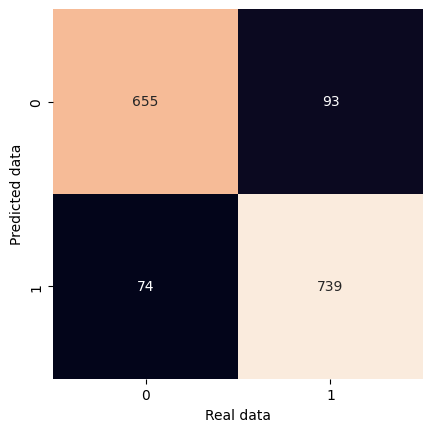

In [162]:
matrix = confusion_matrix(test_data["ack"], predicted)
sns.heatmap(matrix.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel("Real data")
plt.ylabel("Predicted data")

In [163]:
nb = GaussianNB()

nb.fit(df_train_class, train_labels)

predicted_nb = nb.predict(df_test_class)

print("Accuracy:", metrics.accuracy_score(validation_labels, predicted_nb))
print("Precision:", precision_score(validation_labels, predicted_nb))
print("Recall:", recall_score(validation_labels, predicted_nb))

Accuracy: 0.903267136450993
Precision: 0.9048751486325802
Recall: 0.9146634615384616


Na porovnanie sme si zvolili dva klasifikátory a to DecisionTree klasifikátor a Nayve Bayes model, tak isto ako samoimplementovaný OneR. Ako najlepší vyšiel Nayve Bayes, pretože funguje na báze nepredpokladania akejkoľvek závislosti medzi príznakmi. Preto dokázal napriek nízkej zložitosti algoritmu vykonať najlepšie výsledky, pretože dokázal správne rozhodnúť aj bez vysokej korelácie atribútu(ak by nastala).  Taktiež, jeho efektívna schopnosť rýchleho učenia ho robí výkonnejším ako DecisionTree.

**Optimalizácia - Vylepšenie hyperparametrov**

In [164]:
parameters = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
              'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]}

optimization = GridSearchCV(nb, parameters, cv=10, scoring='accuracy')
result = optimization.fit(df_train_class, train_labels)

best_params = optimization.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'priors': None, 'var_smoothing': 0.001}


In [165]:
scores_df = pd.DataFrame(optimization.cv_results_)
scores_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_priors  \
0        0.004089  6.980694e-04         0.001695        0.000457         None   
1        0.003989  7.727554e-04         0.002792        0.002309         None   
2        0.003192  3.988388e-04         0.001695        0.000779         None   
3        0.003493  6.674861e-04         0.001693        0.000634         None   
4        0.003590  9.146255e-04         0.001447        0.000471         None   
5        0.003291  6.386208e-04         0.001596        0.000661         None   
6        0.003191  5.982798e-04         0.001496        0.000499         None   
7        0.003395  4.894962e-04         0.001295        0.000455         None   
8        0.003293  4.562319e-04         0.001496        0.000499         None   
9        0.002893  5.344281e-04         0.001495        0.000503   [0.2, 0.8]   
10       0.002888  5.366867e-04         0.001549        0.000567   [0.2, 0.8]   
11       0.002992  6.306817e-04         0.001396        0.000492   [0.2, 0.8]   
12       0.003092  6.983725e-04         0.001396        0.000489   [0.2, 0.8]   
13       0.002895  5.398089e-04         0.001493        0.000496   [0.2, 0.8]   
14       0.002993  6.308069e-04         0.001594        0.000661   [0.2, 0.8]   
15       0.002894  5.347052e-04         0.001596        0.000489   [0.2, 0.8]   
16       0.003087  5.413263e-04         0.001599        0.000488   [0.2, 0.8]   
17       0.003092  2.992755e-04         0.001594        0.000488   [0.2, 0.8]   
18       0.003093  5.384814e-04         0.001492        0.000664   [0.5, 0.5]   
19       0.003088  5.348462e-04         0.001500        0.000493   [0.5, 0.5]   
20       0.003197  5.965508e-04         0.001347        0.000538   [0.5, 0.5]   
21       0.003196  5.987405e-04         0.001392        0.000489   [0.5, 0.5]   
22       0.003295  4.553605e-04         0.001692        0.000635   [0.5, 0.5]   
23       0.003290  6.392349e-04         0.001197        0.000402   [0.5, 0.5]   
24       0.003190  5.930621e-04         0.001596        0.000489   [0.5, 0.5]   
25       0.003293  4.598834e-04         0.001594        0.000491   [0.5, 0.5]   
26       0.002992  5.859473e-07         0.001695        0.000457   [0.5, 0.5]   
27       0.003396  6.611329e-04         0.001790        0.000396   [0.8, 0.2]   
28       0.004627  2.258331e-03         0.001797        0.000400   [0.8, 0.2]   
29       0.004204  7.436313e-04         0.002545        0.003347   [0.8, 0.2]   
30       0.004987  5.006559e-03         0.001197        0.000399   [0.8, 0.2]   
31       0.002990  6.281282e-04         0.001498        0.000497   [0.8, 0.2]   
32       0.002996  4.468025e-04         0.001495        0.000497   [0.8, 0.2]   
33       0.003092  5.336959e-04         0.001498        0.000494   [0.8, 0.2]   
34       0.002988  4.458457e-04         0.001500        0.000499   [0.8, 0.2]   
35       0.003295  6.374003e-04         0.001195        0.000400   [0.8, 0.2]   

   param_var_smoothing                                           params  \
0                  0.0         {'priors': None, 'var_smoothing': 1e-09}   
1                  0.0         {'priors': None, 'var_smoothing': 1e-08}   
2                  0.0         {'priors': None, 'var_smoothing': 1e-07}   
3             0.000001         {'priors': None, 'var_smoothing': 1e-06}   
4              0.00001         {'priors': None, 'var_smoothing': 1e-05}   
5               0.0001        {'priors': None, 'var_smoothing': 0.0001}   
6                0.001         {'priors': None, 'var_smoothing': 0.001}   
7                 0.01          {'priors': None, 'var_smoothing': 0.01}   
8                  0.1           {'priors': None, 'var_smoothing': 0.1}   
9                  0.0   {'priors': [0.2, 0.8], 'var_smoothing': 1e-09}   
10                 0.0   {'priors': [0.2, 0.8], 'var_smoothing': 1e-08}   
11                 0.0   {'priors': [0.2, 0.8], 'var_smoothing': 1e-07}   
12            0.000001   {'prio

In [166]:
nb = GaussianNB(var_smoothing=1e-3)
print(optimization.best_estimator_)
nb.fit(df_train_class, train_labels)

predicted_nb = nb.predict(df_test_class)

print("Accuracy:", metrics.accuracy_score(validation_labels, predicted_nb))
print("Precision:", precision_score(validation_labels, predicted_nb))
print("Recall:", recall_score(validation_labels, predicted_nb))


GaussianNB(var_smoothing=0.001)
Accuracy: 0.903267136450993
Precision: 0.9048751486325802
Recall: 0.9146634615384616


Ako môžeme vidieť, hodnoty sa nezmenili, z toho dävodu, že už sme pre našu konkrétnu úlohu používali pre priors najlepší možný hyperparameter = None, jediný ktorý sa zmenil bol var_smoothing, kde ani pri zmene parametra rozdieľ výsledkov nie je signifikantný.

In [167]:
nb = GaussianNB(var_smoothing=1e-1, priors = [0.8, 0.2])
print(optimization.best_estimator_)
nb.fit(df_train_class, train_labels)

predicted_nb = nb.predict(df_test_class)

print("Accuracy:", metrics.accuracy_score(validation_labels, predicted_nb))
print("Precision:", precision_score(validation_labels, predicted_nb))
print("Recall:", recall_score(validation_labels, predicted_nb))

GaussianNB(var_smoothing=0.001)
Accuracy: 0.8680333119795003
Precision: 0.9458689458689459
Recall: 0.7980769230769231


Ako môžeme vidieť, pri výbere jednej z horších kombinácií hyperparametrov, výsledky už sú o pár čísiel rozdielne, tento konkrétne zvýšil Precision o 4%, no zmenšil Accuracy a Recall pomerne drasticky.

Ako ďalšie spojíme rôzne varianty Naive Bayes klasifikátora:
 - Gaussian
 - Bernoulli

Vytvoríme si voting ensemble model, ktorý porovná a vykoná rozhodnutie s pomocou dvoch výsledkov, každý z jednoho klasifikátora, taktiež k nemu pridáme aj cross validation aj určenie hyperparametrov pomocou GridSearch - spojíme všetko dohromady

In [169]:
from sklearn.model_selection import cross_val_score


gnb_model = GaussianNB()
bnb_model = BernoulliNB()

ensemble_model = VotingClassifier(estimators=[
    ('gnb', gnb_model),
    ('bnb', bnb_model)
], voting='hard')  # 'hard' znamená, že sa použije väčšinové hlasovanie



parameters_GNB = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1],
              'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.8, 0.2]]}

grid_search_gnb = GridSearchCV(gnb_model, parameters_GNB, cv=5, scoring='accuracy')
grid_search_gnb.fit(df_train_class, train_labels)

best_params_gnb = grid_search_gnb.best_params_
print("Best Hyperparameters for GaussianNB:", best_params_gnb)

parameters_BNB = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'binarize': [0.0, 0.2, 0.5],
    'fit_prior': [True, False],
    'class_prior': [None, [0.3, 0.7], [0.5, 0.5]]
}

grid_search_bnb = GridSearchCV(bnb_model, parameters_BNB, cv=5, scoring='accuracy')
grid_search_bnb.fit(df_train_class, train_labels)

best_params_bnb = grid_search_bnb.best_params_
print("Best Hyperparameters for BernoulliNB:", best_params_bnb)


ensemble_model.estimators_ = [grid_search_gnb.best_estimator_, grid_search_bnb.best_estimator_]

cross_val_accuracy = cross_val_score(ensemble_model, df_train_class, train_labels, cv=5, scoring='accuracy')
print("Cross Validation Accuracy for Ensemble Model:", cross_val_accuracy.mean())

Best Hyperparameters for GaussianNB: {'priors': None, 'var_smoothing': 0.001}
Best Hyperparameters for BernoulliNB: {'alpha': 0.1, 'binarize': 0.0, 'class_prior': [0.3, 0.7], 'fit_prior': True}
Cross Validation Accuracy for Ensemble Model: 0.8397923466978712


Aj napriek optimalizácie všetkého sa nečakane výsledok zhoršil až o 7% oproti samotnej GaussianNB, čo znamená, že BernoulliNB aj napriek tomu, že má hyperparametre optimalizované, je stále nevýkonná pre tieto úlohy.